## 1. Data Understanding

### 1.1 Loading the data 

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import seaborn as sns

In [2]:
file_path = r'C:\Users\\lydia\\Downloads\\hospital-inpatient-discharges-pneumonia.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

C:\Users\lydia\AppData\Local\Temp\ipykernel_27960\4038884469.py:4: DtypeWarning: Columns (10,26,27,28,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,Payment Typology 1,Payment Topology 2,Payment Typology 3,Payment Typology 2,Facility Id,Ratio of Total Costs to Total Charges
0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,105.0,F,White,Not Span/Hispanic,...,N,Y,29059.14,9233.80,NaN,NaN,NaN,NaN,NaN,NaN
1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,105.0,F,White,Not Span/Hispanic,...,N,Y,15622.27,4815.69,NaN,NaN,NaN,NaN,NaN,NaN
2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,109.0,M,White,Not Span/Hispanic,...,N,Y,10190.43,3238.55,NaN,NaN,NaN,NaN,NaN,NaN
3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,112.0,F,Other Race,Not Span/Hispanic,...,N,Y,39250.92,12652.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,120.0,M,White,Not Span/Hispanic,...,N,N,10578.58,5315.97,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Data Inspection

In [3]:
df.shape

(379463, 43)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379463 entries, 0 to 379462
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Health Service Area                    379454 non-null  object 
 1   Hospital County                        379454 non-null  object 
 2   Operating Certificate Number           379454 non-null  float64
 3   Facility ID                            333778 non-null  float64
 4   Facility Name                          379463 non-null  object 
 5   Age Group                              379463 non-null  object 
 6   Zip Code - 3 digits                    379098 non-null  object 
 7   Gender                                 379463 non-null  object 
 8   Race                                   379463 non-null  object 
 9   Ethnicity                              379463 non-null  object 
 10  Length of Stay                         379463 non-null  

Before we clean the data we have 379463 rows and 43 columns

## 2. Data Cleaning

### 2.1 Dropping unnecessary columns

In [5]:
df = df.drop(columns = ['Operating Certificate Number','Facility ID','Attending Provider License Number',
                        'Operating Provider License Number','Other Provider License Number', 'Birth Weight'])

The columns above have are not needed for us to carry out our analysis hence us dropping them.

### 2.2 Handling Missing values

In [6]:
# Checking for missing values
df.isnull().sum()

Health Service Area                           9
Hospital County                               9
Facility Name                                 0
Age Group                                     0
Zip Code - 3 digits                         365
Gender                                        0
Race                                          0
Ethnicity                                     0
Length of Stay                                0
Type of Admission                             0
Patient Disposition                           6
Discharge Year                                0
CCS Diagnosis Code                            0
CCS Diagnosis Description                     0
CCS Procedure Code                            0
CCS Procedure Description                     0
APR DRG Code                                  0
APR DRG Description                           0
APR MDC Code                                  0
APR MDC Description                           0
APR Severity of Illness Code            

There are missing values present in some of the columns. To get a better understanding of the missing values we want to investigate the percentage of missing values per column.

In [7]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Round the percentages
rounded_missing_percentage = missing_percentage.round()

# Display the rounded percentage of missing values for each column
print("Rounded percentage of missing values for each column:")
print(rounded_missing_percentage)

Rounded percentage of missing values for each column:
Health Service Area                       0.0
Hospital County                           0.0
Facility Name                             0.0
Age Group                                 0.0
Zip Code - 3 digits                       0.0
Gender                                    0.0
Race                                      0.0
Ethnicity                                 0.0
Length of Stay                            0.0
Type of Admission                         0.0
Patient Disposition                       0.0
Discharge Year                            0.0
CCS Diagnosis Code                        0.0
CCS Diagnosis Description                 0.0
CCS Procedure Code                        0.0
CCS Procedure Description                 0.0
APR DRG Code                              0.0
APR DRG Description                       0.0
APR MDC Code                              0.0
APR MDC Description                       0.0
APR Severity of Illness Co

To ensure the quality and reliability of our data analysis, we have decided to drop any columns where the proportion of null values exceeds 40%.

In [8]:
# Selecting columns to drop
columns_to_drop = rounded_missing_percentage[rounded_missing_percentage >= 40].index
df = df.drop(columns=columns_to_drop)

# Display the Missing values after dropping columns
print("\nMissing values after dropping columns with 40% or more missing values:")
print(df.isnull().sum())


Missing values after dropping columns with 40% or more missing values:
Health Service Area                         9
Hospital County                             9
Facility Name                               0
Age Group                                   0
Zip Code - 3 digits                       365
Gender                                      0
Race                                        0
Ethnicity                                   0
Length of Stay                              0
Type of Admission                           0
Patient Disposition                         6
Discharge Year                              0
CCS Diagnosis Code                          0
CCS Diagnosis Description                   0
CCS Procedure Code                          0
CCS Procedure Description                   0
APR DRG Code                                0
APR DRG Description                         0
APR MDC Code                                0
APR MDC Description                         0
APR Seve

After removing columns with more than 40% missing values, some missing values still remain in the dataset. For cases where the number of missing values is fewer than 9, we will proceed by dropping the affected rows.

In [9]:
# Dropping the rows where missing values are less than 10
df = df.dropna(subset=['Health Service Area'])
df = df.dropna(subset=['Patient Disposition'])
df = df.dropna(subset=['APR Severity of Illness Description'])
df.isnull().sum()

Health Service Area                         0
Hospital County                             0
Facility Name                               0
Age Group                                   0
Zip Code - 3 digits                       360
Gender                                      0
Race                                        0
Ethnicity                                   0
Length of Stay                              0
Type of Admission                           0
Patient Disposition                         0
Discharge Year                              0
CCS Diagnosis Code                          0
CCS Diagnosis Description                   0
CCS Procedure Code                          0
CCS Procedure Description                   0
APR DRG Code                                0
APR DRG Description                         0
APR MDC Code                                0
APR MDC Description                         0
APR Severity of Illness Code                0
APR Severity of Illness Descriptio

For the 'Payment typology 1' column, we will replace missing values with the placeholder 'unknown'. 

In [10]:
# Replacing the missing values with unknown
df['Payment Typology 1'].fillna('unknown', inplace=True)

# Checking the missing values 
df.isnull().sum()

Health Service Area                      0
Hospital County                          0
Facility Name                            0
Age Group                                0
Zip Code - 3 digits                    360
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
Patient Disposition                      0
Discharge Year                           0
CCS Diagnosis Code                       0
CCS Diagnosis Description                0
CCS Procedure Code                       0
CCS Procedure Description                0
APR DRG Code                             0
APR DRG Description                      0
APR MDC Code                             0
APR MDC Description                      0
APR Severity of Illness Code             0
APR Severity of Illness Description      0
APR Risk of Mortality                    0
APR Medical

Upon inspecting the data, we found that the 'Zip Code' column corresponds to the hospital county. Based on this relationship, we will identify counties with missing values and replace them with the appropriate zip codes corresponding to those counties.

In [11]:
# Filter rows where 'Zip Code' is missing
missing_zip_df = df[df['Zip Code - 3 digits'].isnull()]

# Get unique counties with missing zip codes
counties_with_missing_zip = missing_zip_df['Hospital County'].drop_duplicates().tolist()

print("Counties with missing zip codes:")
print(counties_with_missing_zip)

Counties with missing zip codes:
['Clinton', 'Oneida', 'Rensselaer', 'Bronx', 'Manhattan', 'Queens', 'Chemung', 'Jefferson', 'Nassau', 'Onondaga', 'Otsego', 'Rockland', 'Westchester', 'Richmond', 'Steuben', 'Broome', 'Cortland', 'Lewis', 'Tompkins', 'Kings', 'Putnam', 'Suffolk', 'Chautauqua', 'Ontario', 'Albany', 'Saratoga', 'Franklin']


The output displays counties with missing zip codes. To ensure consistency with the existing data format, we researched the zip codes for these counties and used only the first three digits. This approach aligns with the format used in the dataset.

In [12]:
# Mapping of counties to their respective three-digit zip codes
county_to_zip_prefix = {
    'Albany': '122','Bronx': '104','Brooklyn': '112','Broome': '139','Chemung': '149','Chautauqua': '147','Clinton': '129','Cortland': '130',
    'Franklin': '129','Jefferson': '136','Kings': '112','Lewis': '133','Manhattan': '100','Nassau': '115','Oneida': '134',
    'Onondaga': '132','Ontario': '144','Otsego': '138','Putnam': '105','Queens': '111','Rensselaer': '121','Richmond': '103',
    'Rockland': '109','Saratoga': '128','Steuben': '148','Suffolk': '117','Tompkins': '148','Westchester': '105'
}

# Function to replace missing zip codes based on county
def fill_zip_code(row):
    if pd.isnull(row['Zip Code - 3 digits']):
        return county_to_zip_prefix.get(row['Hospital County'], None)
    return row['Zip Code - 3 digits']

# Apply the function to fill missing values
df['Zip Code - 3 digits'] = df.apply(fill_zip_code, axis=1)

# Checking the missing values 
df.isnull().sum()

Health Service Area                    0
Hospital County                        0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surgical Description       0
Abortion Edit In

All the missing values have been taken care of.

### 2.3 Checking for Duplicates

In [13]:
# Checking for duplicates
df.duplicated().sum()

406

There are 406 duplicates in our data, we decided to drop them because removing the entries ensures data integrity, accuracy, and efficiency by eliminating redundancy and preventing bias in analysis.

In [14]:
# Dropping duplicates
df = df.drop_duplicates()

In [15]:
# Checking for duplicate after being dropped
df.duplicated().sum()

0

We have removed all the duplicated values

### 2.4 Checking Invalid Entries

In [16]:
# Define common placeholders
placeholders = ["N/A", "NA", "null", "None", "undefined", "", 'nan']

# Initialize a dictionary to hold placeholder counts
placeholder_counts = {placeholder: 0 for placeholder in placeholders}

# Loop through each placeholder and count its occurrences
for placeholder in placeholders:
    # Use case-insensitive comparison and strip leading/trailing spaces
    placeholder_count = (df.applymap(lambda x: str(x).strip().lower()) == placeholder.lower()).sum().sum()
    if placeholder_count > 0:
        placeholder_counts[placeholder] = placeholder_count

# Print the counts of each placeholder
for placeholder, count in placeholder_counts.items():
    if count >= 0:
        print(f"Found {count} occurrences of placeholder '{placeholder}'")


Found 0 occurrences of placeholder 'N/A'
Found 0 occurrences of placeholder 'NA'
Found 0 occurrences of placeholder 'null'
Found 0 occurrences of placeholder 'None'
Found 0 occurrences of placeholder 'undefined'
Found 0 occurrences of placeholder ''
Found 0 occurrences of placeholder 'nan'


This code counts occurrences of common placeholder values representing missing or undefined data in the dataset to help assess and address data quality issues. From the output there arent any invalid entries in the data set.

Upon inspection of the Zip code column we noticed a place holder value OOS. In order to understand this we want to check the counties that have this place holder

In [17]:
# Filter the DataFrame to find rows where Zip Code is 'OOS'
oos_counties = df[df['Zip Code - 3 digits'].str.strip().str.upper() == 'OOS']

# Get the unique counties with 'OOS' in Zip Code
oos_county_list = oos_counties['Hospital County'].unique()

# Display the counties
print("Counties with 'OOS' in Zip Code:")
for county in oos_county_list:
    print(county)

Counties with 'OOS' in Zip Code:
Albany
Allegany
Broome
Cattaraugus
Cayuga
Chautauqua
Chemung
Clinton
Cortland
Delaware
Dutchess
Erie
Suffolk
Essex
Franklin
Jefferson
Lewis
Livingston
Madison
Monroe
Montgomery
Nassau
Niagara
Oneida
Onondaga
Ontario
Orange
Orleans
Oswego
Otsego
Putnam
Rensselaer
Rockland
St Lawrence
Saratoga
Schenectady
Schoharie
Steuben
Sullivan
Tompkins
Ulster
Warren
Wayne
Westchester
Wyoming
Bronx
Kings
Manhattan
Queens
Richmond
Chenango
Genesee
Yates
Herkimer
Columbia
Fulton
Schuyler


To take care of the place holders, we will filter the DataFrame to exclude rows where the zip code is 'OOS', then create a dictionary mapping each hospital county to its corresponding zip code by selecting the first valid zip code for each county.

In [18]:
# Filter the DataFrame to get rows where Zip Code is not 'OOS'
valid_zip_codes_df = df[df['Zip Code - 3 digits'].str.strip().str.upper() != 'OOS']

# Create a dictionary mapping counties to zip codes
zip_code_mapping = valid_zip_codes_df[['Hospital County', 'Zip Code - 3 digits']].drop_duplicates()
zip_code_mapping = zip_code_mapping.dropna()
zip_code_mapping = zip_code_mapping.groupby('Hospital County')['Zip Code - 3 digits'].first().to_dict()

# Print the zip code mapping for verification
print("Zip Code Mapping from Existing Data:")
for county, zip_code in zip_code_mapping.items():
    print(f"{county}: {zip_code}")

Zip Code Mapping from Existing Data:
Albany: 105.0
Allegany: 145
Bronx: 100
Broome: 120
Cattaraugus: 140
Cayuga: 121
Chautauqua: 140
Chemung: 130
Chenango: 133
Clinton: 121
Columbia: 120
Cortland: 109
Delaware: 117
Dutchess: 104
Erie: 140
Essex: 128
Franklin: 120
Fulton: 120
Genesee: 140
Herkimer: 133
Jefferson: 131
Kings: 100
Lewis: 109
Livingston: 144
Madison: 130
Manhattan: 100
Monroe: 117
Montgomery: 120
Nassau: 110
Niagara: 130
Oneida: 120
Onondaga: 130
Ontario: 131
Orange: 100
Orleans: 140
Oswego: 130
Otsego: 120
Putnam: 105
Queens: 100
Rensselaer: 120
Richmond: 103
Rockland: 109
Saratoga: 104
Schenectady: 100
Schoharie: 120
Schuyler: 145
St Lawrence: 136
Steuben: 144
Suffolk: 109
Sullivan: 113
Tompkins: 112
Ulster: 100
Warren: 103
Wayne: 131
Westchester: 104
Wyoming: 140
Yates: 131


In [19]:
# Replace 'OOS' with the correct zip code based on the county
df['Zip Code - 3 digits'] = df.apply(
    lambda row: zip_code_mapping.get(row['Hospital County'], row['Zip Code - 3 digits'])
    if row['Zip Code - 3 digits'].strip().upper() == 'OOS' else row['Zip Code - 3 digits'],
    axis=1
)

In [20]:
# Count occurrences of 'OOS' in the Zip Code - 3 digits column
oos_count = df[df['Zip Code - 3 digits'].str.strip().str.upper() == 'OOS'].shape[0]

# Print the number of occurrences
print(f"Number of 'OOS' still present in Zip Code - 3 digits column: {oos_count}")

Number of 'OOS' still present in Zip Code - 3 digits column: 0


All the place holders have been removed. 

### 2.5 Checking Data Types

In [21]:
# Checking the data types
df.dtypes

Health Service Area                     object
Hospital County                         object
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                     float64
CCS Diagnosis Description               object
CCS Procedure Code                     float64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Description                     object
APR Severity of Illness Code             int64
APR Severity 

There are two columns that do not have an appropriate data type Zip Code and Length of Stay. 

- Some zip code values in our dataset were represented as floats. Zip codes are generally whole numbers, so these float representations were not appropriate for our analysis.

- The 'Length of Stay' column is currently saved as an object data type, whereas it should be numeric. To understand the reason for this, we will examine the unique values in this column.

In [22]:
# Convert all values to numeric, forcing errors to NaN
df['Zip Code - 3 digits'] = pd.to_numeric(df['Zip Code - 3 digits'], errors='coerce')

# Round off zip code values to the nearest whole number and convert to integer
df['Zip Code - 3 digits'] = df['Zip Code - 3 digits'].round().astype(int)

# Checking if the conversion caused NA values 
df.isnull().sum()

Health Service Area                    0
Hospital County                        0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surgical Description       0
Abortion Edit In

In [23]:
# Checking if the column is no longer a float
df['Zip Code - 3 digits'].dtypes

dtype('int32')

The data type has been sucessfuly changed. 

In [24]:
unique_values = df['Length of Stay'].unique()

# Print the unique values
print(unique_values)

['6' '3' '2' '5' '9' '1' '20' '4' '37' '8' '27' '21' '23' '7' '31' '14'
 '11' '46' '18' '28' '10' '15' '17' '32' '13' '24' '22' '12' '33' '26'
 '19' '16' '34' '58' '39' '40' '29' '25' '38' '35' '100' '30' '72' '36'
 '110' '96' '63' '43' '44' '75' '57' '62' '42' '115' '87' '120 +' '73'
 '69' '59' '76' '81' '86' '52' '118' '78' '88' '54' '47' '61' '66' '94'
 '41' '45' '112' '82' '64' '77' '60' '53' '56' '49' '98' '70' '97' '90'
 '51' '50' '65' '84' '89' '55' '48' '71' '92' '79' '109' '80' '83' '67'
 '111' '95' '91' '68' '74' '101' '117' '85' '103' '104' '102' '108' '114'
 '106' '107' '116' '113' '119' '93' '105' 6 4 9 3 5 8 2 14 15 20 21 13 1
 11 7 55 48 26 12 10 58 23 28 16 18 37 19 29 30 31 49 50 75 25 43 17 35 22
 27 41 51 32 24 34 42 33 44 47 68 53 40 39 94 118 46 45 38 105 70 64 36 76
 88 72 '99']


Looking at the unique values there are numbers that have quotes this shows that the numbers are saved as strings. Additionally there are values that have a plus sign. Firstly we want to see how many 120+ days are there in the data. 

In [25]:
# Count occurrences of '120+'
count_120_plus = df['Length of Stay'].str.contains('120\ +', regex=True).sum()

print(f"Number of entries with '120 +': {count_120_plus}")

Number of entries with '120 +': 124


We have identified 124 patients who stayed for more than 120 days, and we will retain the "120+" values for our analysis as they are crucial. To handle this, we will separate the 'Length of Stay' column into two cases: one with "120+" and the other with numeric and string values. We will convert the numeric and string values into numeric format while preserving the "120+" values. After processing, the 'Length of Stay' column will remain as an object data type due to the presence of "120+".

In [26]:
# Separate rows with special cases (e.g., values containing '+')
special_cases = df['Length of Stay'].str.contains(r'\+', na=False)
special_values = df[special_cases]
remaining_values = df[~special_cases]

# Function to check for non-numeric values
def check_non_numeric(value):
    try:
        pd.to_numeric(value, errors='raise')
        return None  # Value is numeric
    except (ValueError, TypeError):
        return value  # Value is not numeric

In [27]:
# Function to clean and convert remaining values to numeric, errors are coerced to NaN
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value, errors='coerce')  # Convert to numeric or NaN if conversion fails
    except ValueError:
        return None

# Apply the function to remaining values
remaining_values['Length of Stay'] = remaining_values['Length of Stay'].apply(convert_to_numeric)

# Recombine with special values
df_cleaned = pd.concat([remaining_values, special_values], ignore_index=True)

# Ensure that the Length of Stay column in df is properly formatted
df['Length of Stay'] = df_cleaned['Length of Stay']

print("Unique values in the Length of Stay column after recombining:")
print(df['Length of Stay'].unique())
print(f"Number of missing values: {df['Length of Stay'].isnull().sum()}")


Unique values in the Length of Stay column after recombining:
[6 3 2 5 9 1 20 4 37 8 27 21 23 7 31 14 11 46 18 28 10 15 17 32 13 24 22
 12 33 19 16 34 26 58 39 40 29 25 38 35 100 30 72 36 110 96 63 43 44 75 57
 42 115 87 73 69 59 76 81 86 52 118 78 88 54 47 61 66 94 41 45 112 82 64
 77 60 53 56 49 98 70 97 90 51 62 50 65 84 89 55 48 71 92 79 109 80 83 67
 111 95 91 68 74 101 117 85 103 104 102 108 114 106 107 116 113 119 93 105
 99 '120 +' nan]
Number of missing values: 423


C:\Users\lydia\AppData\Local\Temp\ipykernel_27960\213297715.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remaining_values['Length of Stay'] = remaining_values['Length of Stay'].apply(convert_to_numeric)


The conversion has created 423 missing values. We will treat these missing values using forward fill because it allows us to use preceding data points to fill in gaps, which is particularly useful when earlier values are expected to be similar to subsequent values. 

In [28]:
# Perform backward fill
df['Length of Stay'] = df['Length of Stay'].fillna(method='ffill')

In [29]:
# Checking if the conversion created any missing values
df.isnull().sum()

Health Service Area                    0
Hospital County                        0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surgical Description       0
Abortion Edit In

The missing values have been taken care of.

In [30]:
# Checking the data types after the conversion
df.dtypes

Health Service Area                     object
Hospital County                         object
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                      int32
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                     float64
CCS Diagnosis Description               object
CCS Procedure Code                     float64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Description                     object
APR Severity of Illness Code             int64
APR Severity 

The 'Length of Stay' column has been maintained as an object type as intended. This is acceptable because it allows us to retain the "120+" values that are essential for our analysis

### 2.6 Handling Outliers

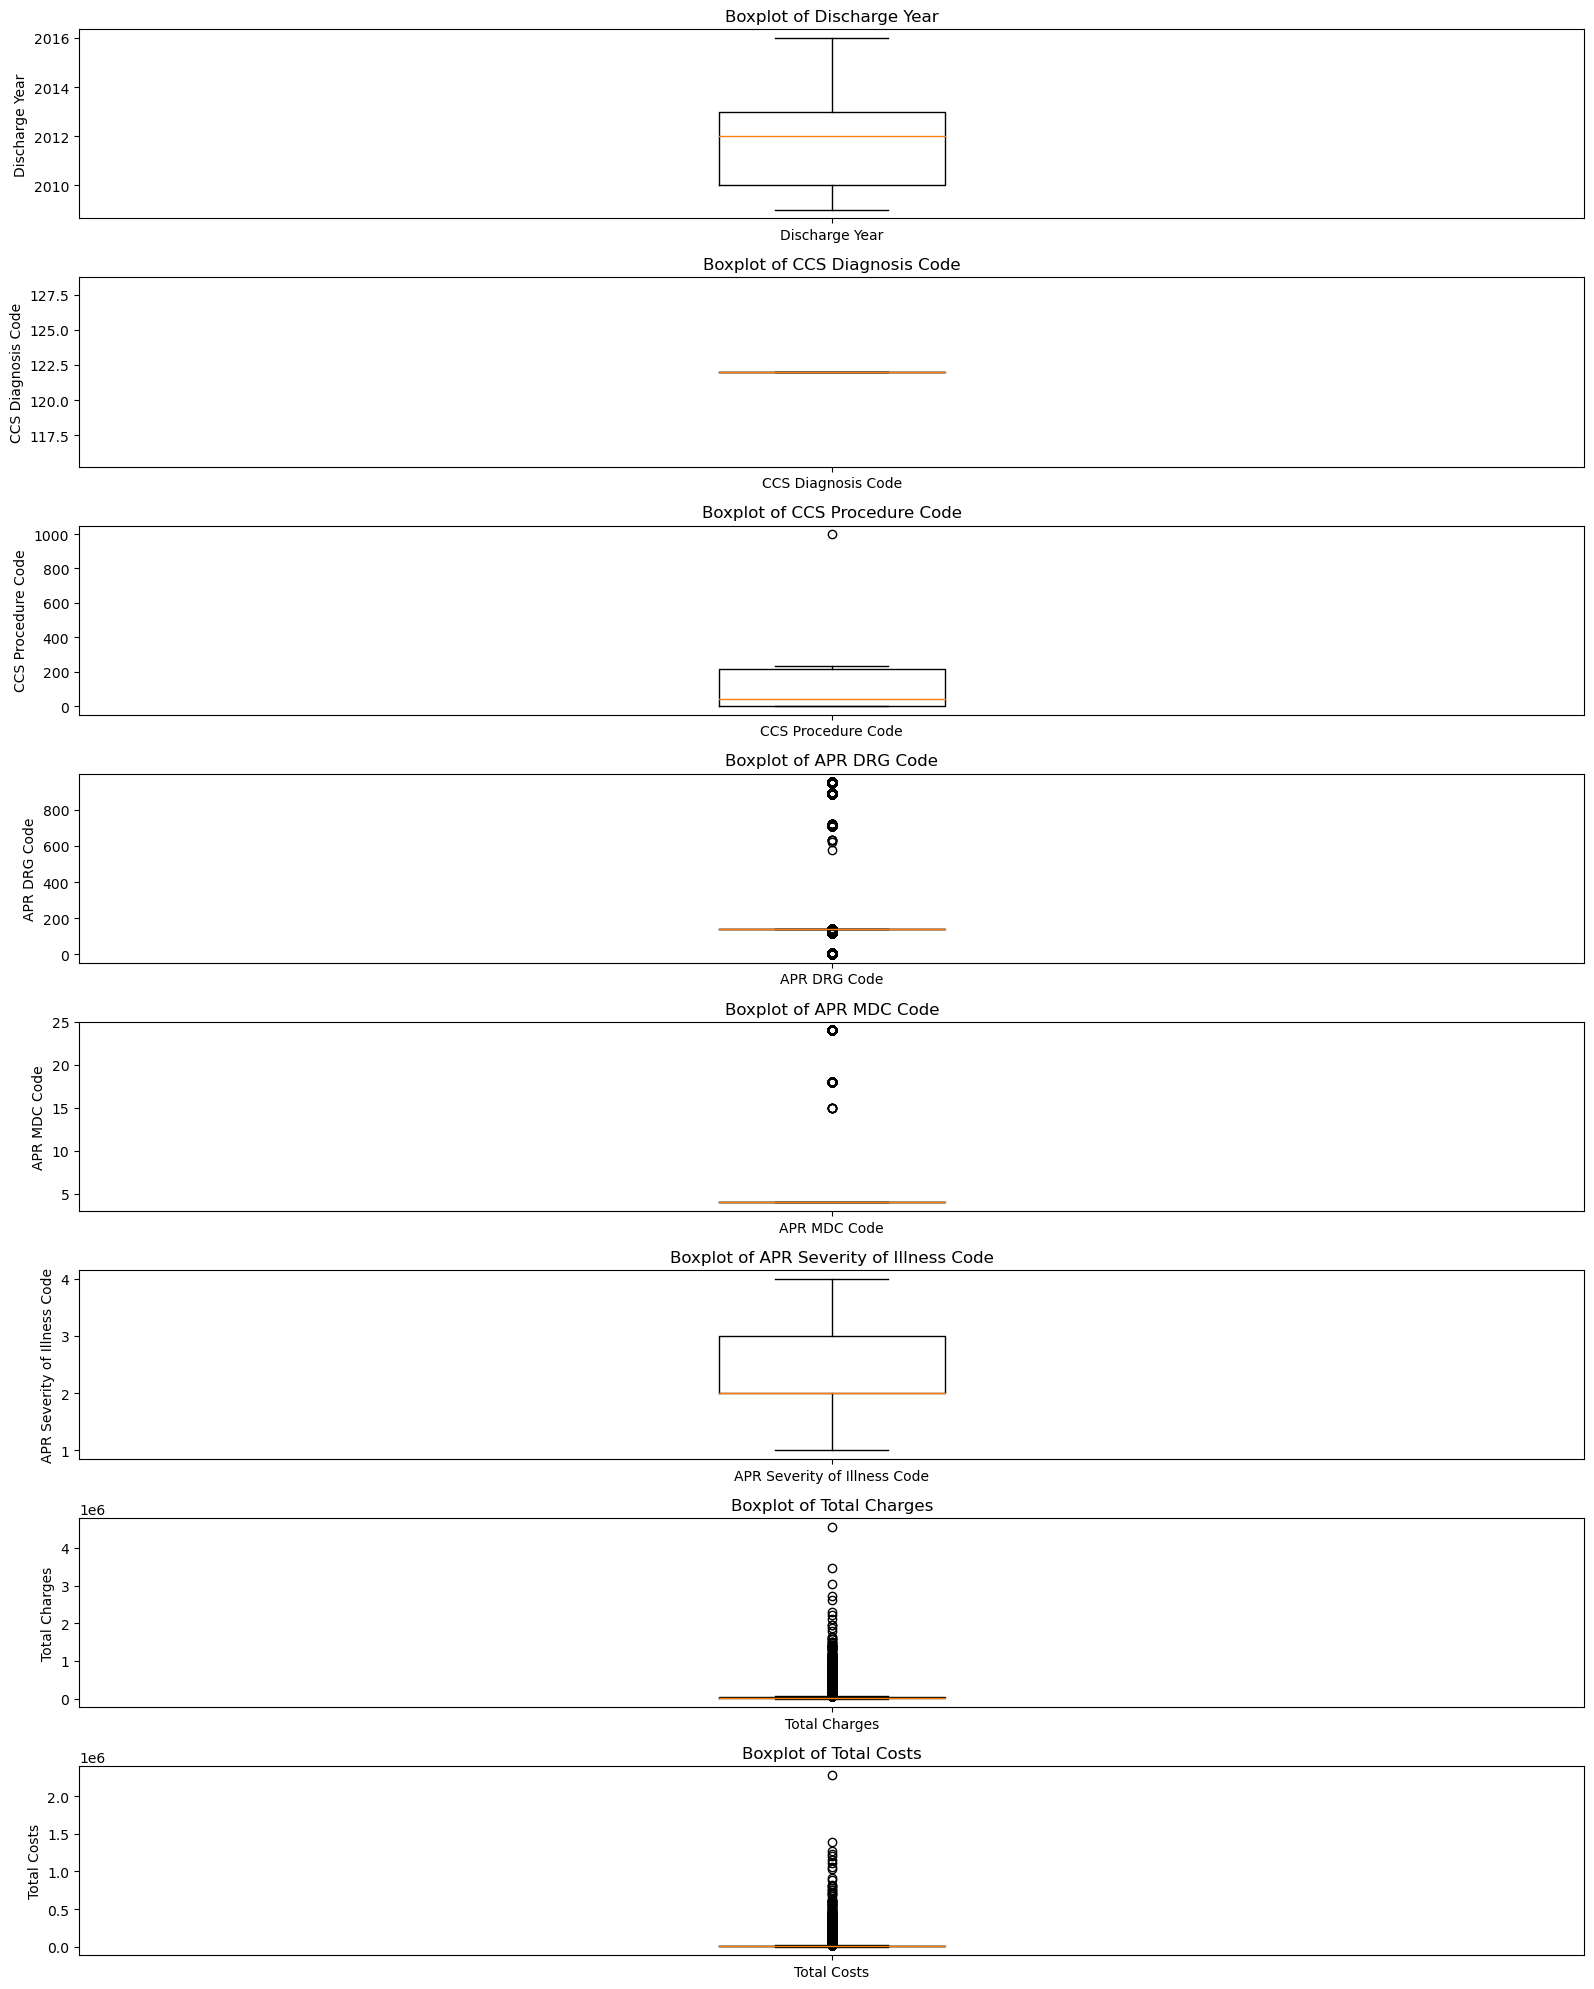

In [31]:
# Creating boxplots for numeric columns 

# Filter numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(16, 20))  # Increase size to accommodate more plots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)  # Number of rows = number of numerical columns
    plt.boxplot(df[col].dropna())  # Drop NaN values for the boxplot
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xticks([1], [col])  # Set x-tick labels

plt.tight_layout()
plt.show()

Justification for Keeping Outliers:

1. APR MDC Code and APR DRG Code: These codes categorize medical diagnoses and treatments. Outliers in these codes might represent rare or unusual cases that are crucial for a complete analysis of the patient population. Excluding them could lead to a biased understanding of the diagnosis and treatment distributions.


2. Total Charges: Outliers in total charges can indicate exceptionally high-cost cases, such as complex or prolonged hospitalizations. Retaining these outliers is important for accurately assessing the full range of charges.


3. Total Costs: Similarly, outliers in total costs may reflect extreme cases with unusually high or low costs. Including these outliers ensures a thorough evaluation of cost patterns and helps in identifying factors that contribute to significant cost variations.

### 2.7 Reviewing the Cleaned Data

In [32]:
# Shape of the data 
df.shape

(379040, 29)

Our cleaned data has 379,040 rows and 29 columns

In [33]:
# Checking the columns
df.columns

Index(['Health Service Area', 'Hospital County', 'Facility Name', 'Age Group',
       'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'Discharge Year',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'Payment Typology 1'],
      dtype='object')

In [34]:
# The data types
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
Health Service Area                     object
Hospital County                         object
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                      int32
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                     float64
CCS Diagnosis Description               object
CCS Procedure Code                     float64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Description                     object
APR Severity of Illness Code    

In [35]:
# Sample of the data
print("\nRandom sample of the cleaned data:")
print(df.sample(5)) 


Random sample of the cleaned data:
       Health Service Area Hospital County  \
269562       New York City       Manhattan   
368991       New York City          Queens   
111327       New York City       Manhattan   
292443        Finger Lakes          Monroe   
285862         Long Island         Suffolk   

                                            Facility Name    Age Group  \
269562                           Bellevue Hospital Center     30 to 49   
368991                  Long Island Jewish Medical Center  70 or Older   
111327  New York Presbyterian Hospital - New York Weil...     30 to 49   
292443                         Rochester General Hospital  70 or Older   
285862                                Huntington Hospital     50 to 69   

        Zip Code - 3 digits Gender                    Race          Ethnicity  \
269562                  114      F  Black/African American  Not Span/Hispanic   
368991                  114      M  Black/African American  Not Span/Hispanic   

## 3. Exploratory Data Analysis

## 3.1 Univariate Analysis

### Descriptive Statistics

In [36]:
# Descriptive Statistics 
df.describe()

,Zip Code - 3 digits,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs
count,379040.000000,379040.000000,379040.0,379040.000000,379040.000000,379040.000000,379040.000000,3.790400e+05,3.790400e+05
mean,119.360345,2011.900251,122.0,97.007661,155.498185,4.296570,2.433157,3.171435e+04,1.144247e+04
std,14.188260,2.192895,0.0,104.304281,115.154542,2.411541,0.838668,4.983998e+04,1.934008e+04
min,100.000000,2009.000000,122.0,0.000000,1.000000,4.000000,1.000000,2.000000e-02,0.000000e+00
25%,109.000000,2010.000000,122.0,0.000000,139.000000,4.000000,2.000000,1.055899e+04,4.276148e+03
50%,115.000000,2012.000000,122.0,39.000000,139.000000,4.000000,2.000000,1.907150e+04,6.996460e+03
75%,130.000000,2013.000000,122.0,217.000000,139.000000,4.000000,3.000000,3.540068e+04,1.217406e+04
max,149.000000,2016.000000,122.0,999.000000,952.000000,24.000000,4.000000,4.563146e+06,2.284311e+06


### Histograms for numeric columns

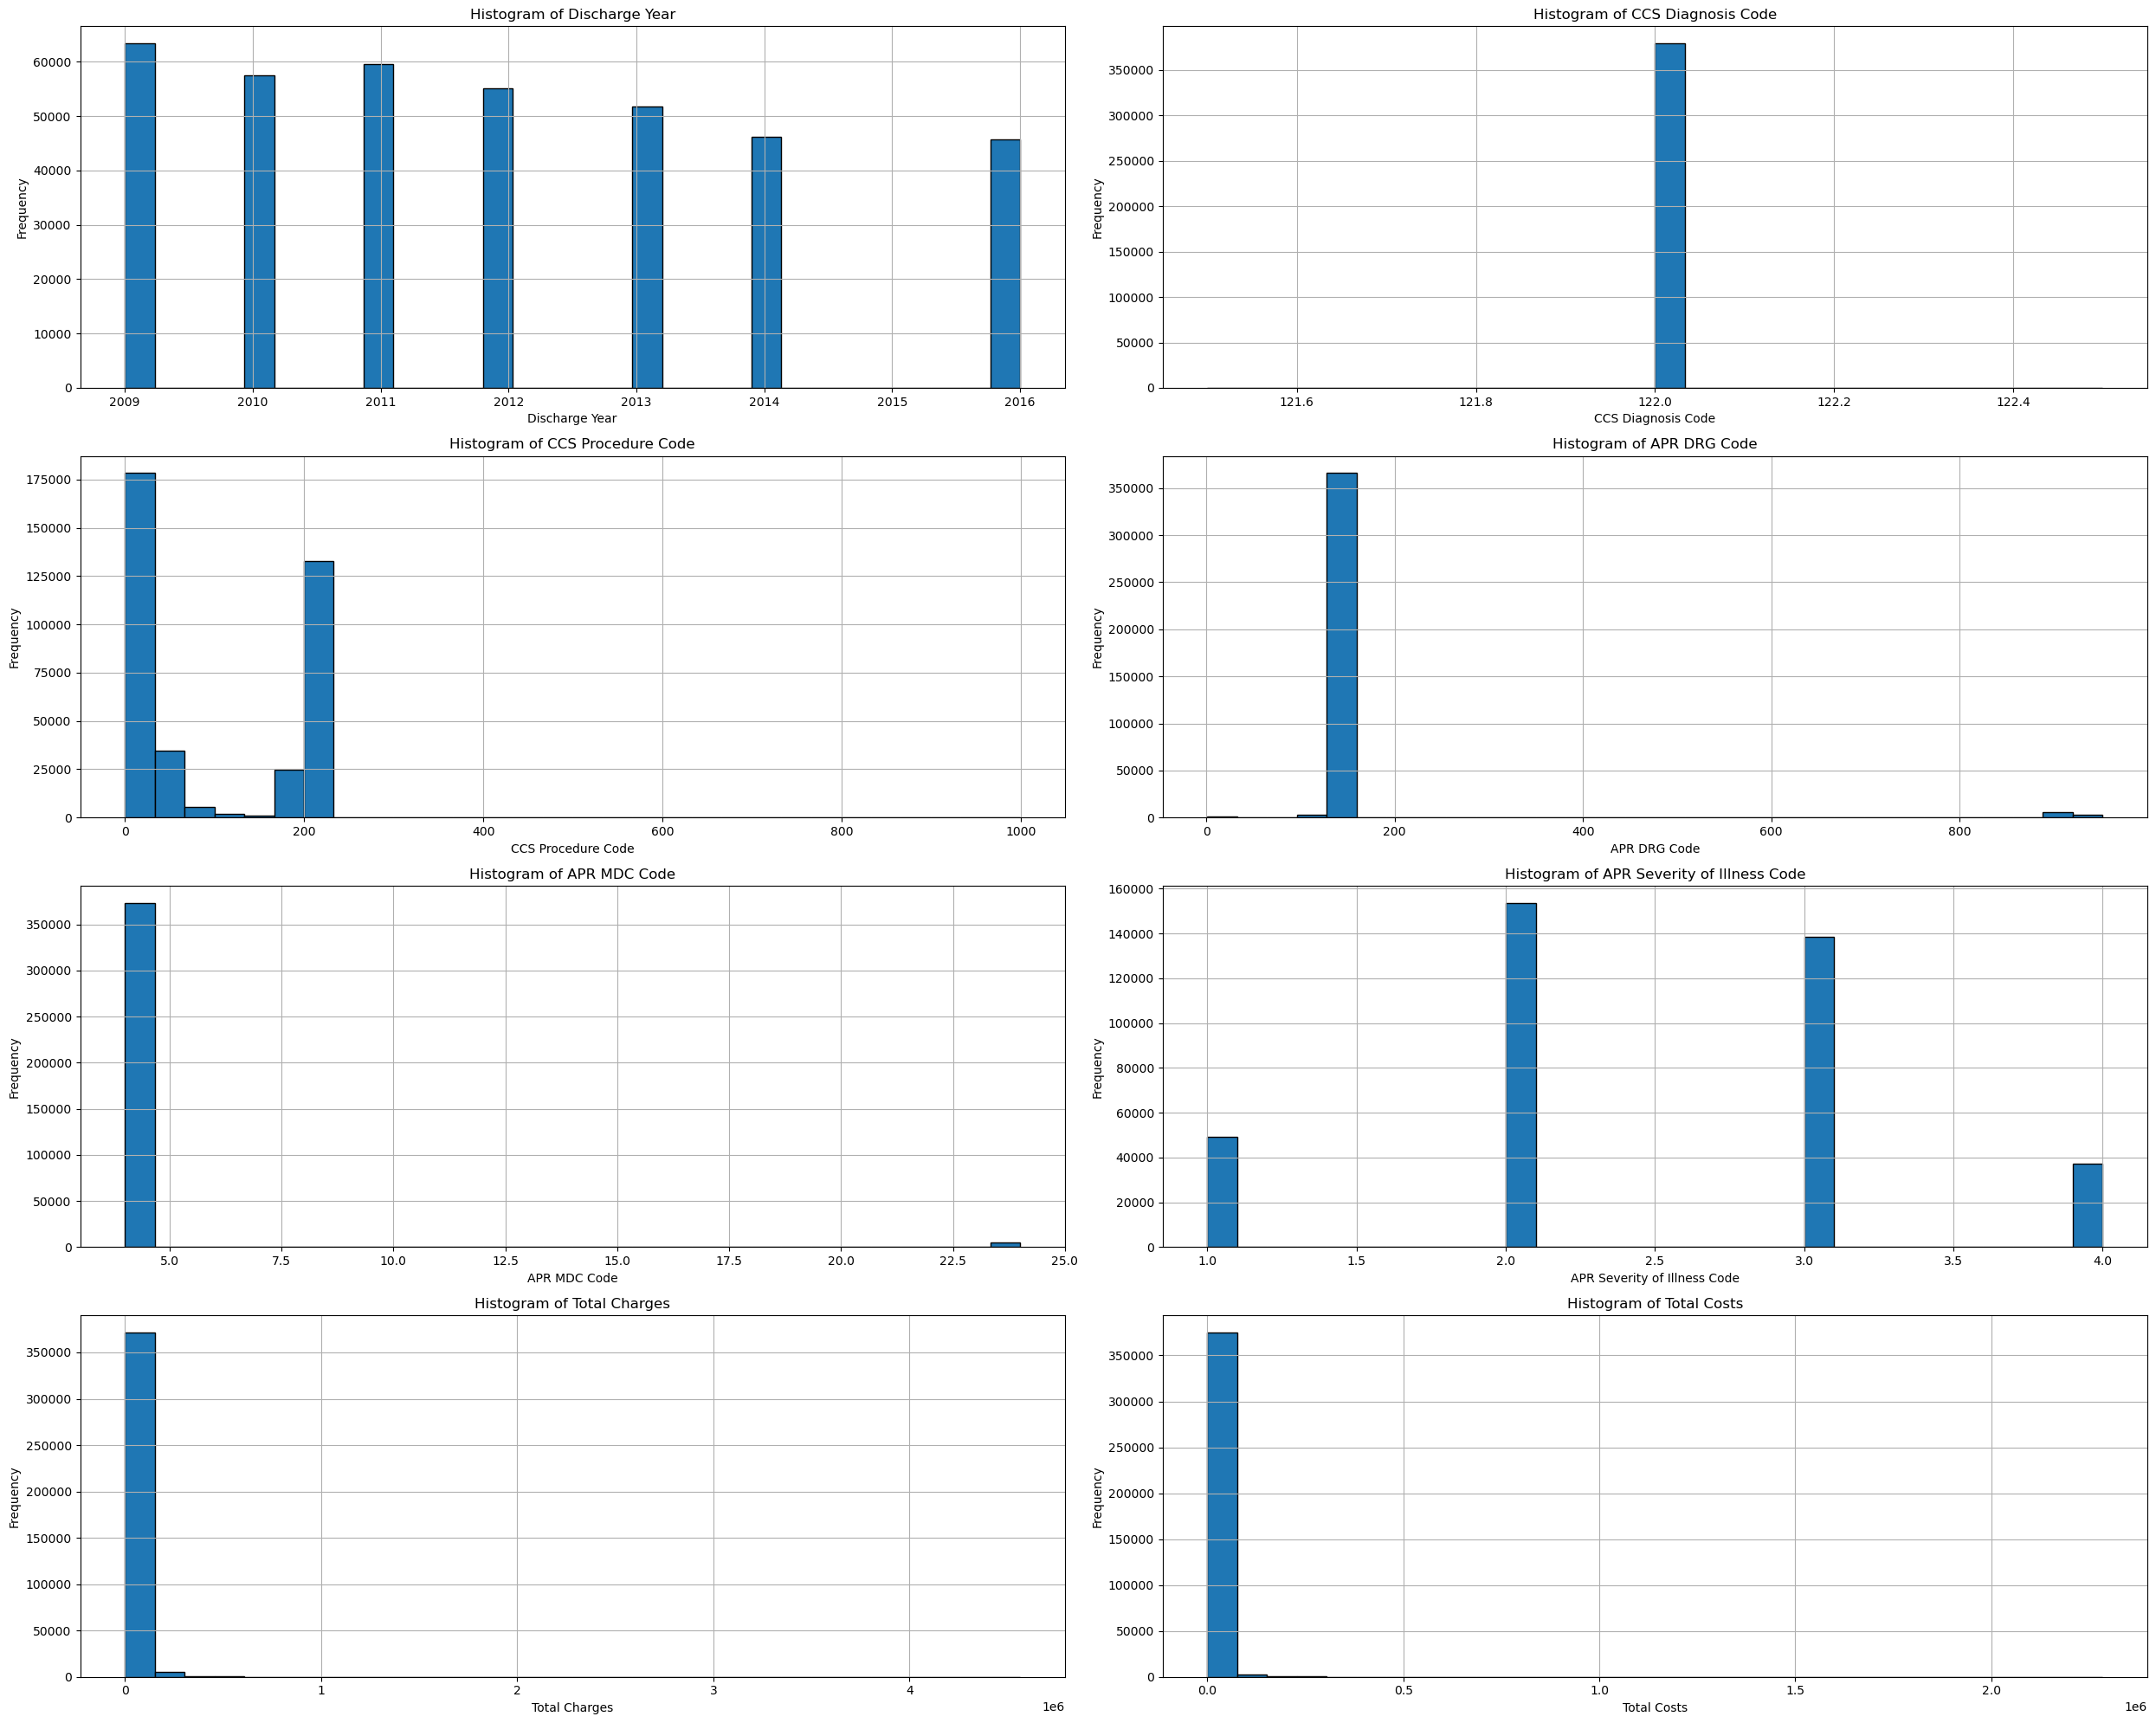

In [37]:
# Plot histograms for all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Determine grid size (rows x columns)
n_cols = 2  # Number of columns for the grid
n_rows = -(-len(numeric_cols) // n_cols)  # Number of rows needed

plt.figure(figsize=(25, 5 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The histograms of the numeric columns reveal varying distributions. Some columns exhibit skewed distributions, indicating that data is not evenly spread and may be concentrated towards one end of the range. Other columns show more symmetric distributions, suggesting a more uniform spread of values. 

### Count Plots for categorical variables

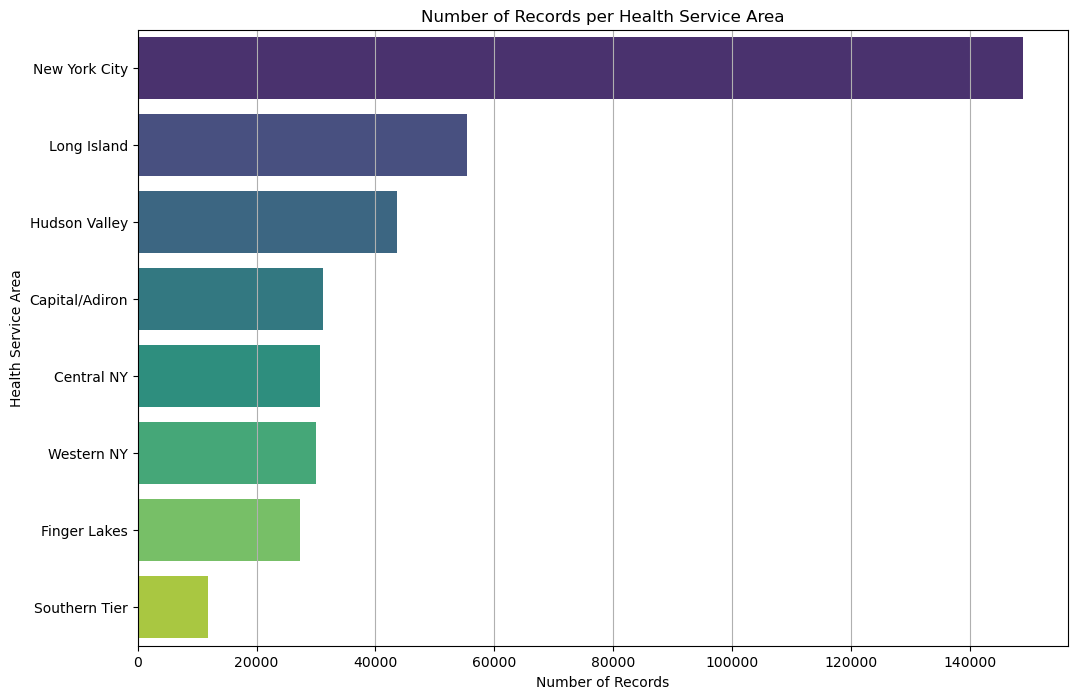

In [38]:
# Count the number of records per Health Service Area
area_counts = df['Health Service Area'].value_counts()

# Create a DataFrame for plotting
area_df = pd.DataFrame({'Health Service Area': area_counts.index, 'Count': area_counts.values})

# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Health Service Area', data=area_df, palette='viridis')
plt.title('Number of Records per Health Service Area')
plt.xlabel('Number of Records')
plt.ylabel('Health Service Area')
plt.grid(axis='x')
plt.show()

New York City has the highest number of records, while Southern Tier has the lowest number of records.

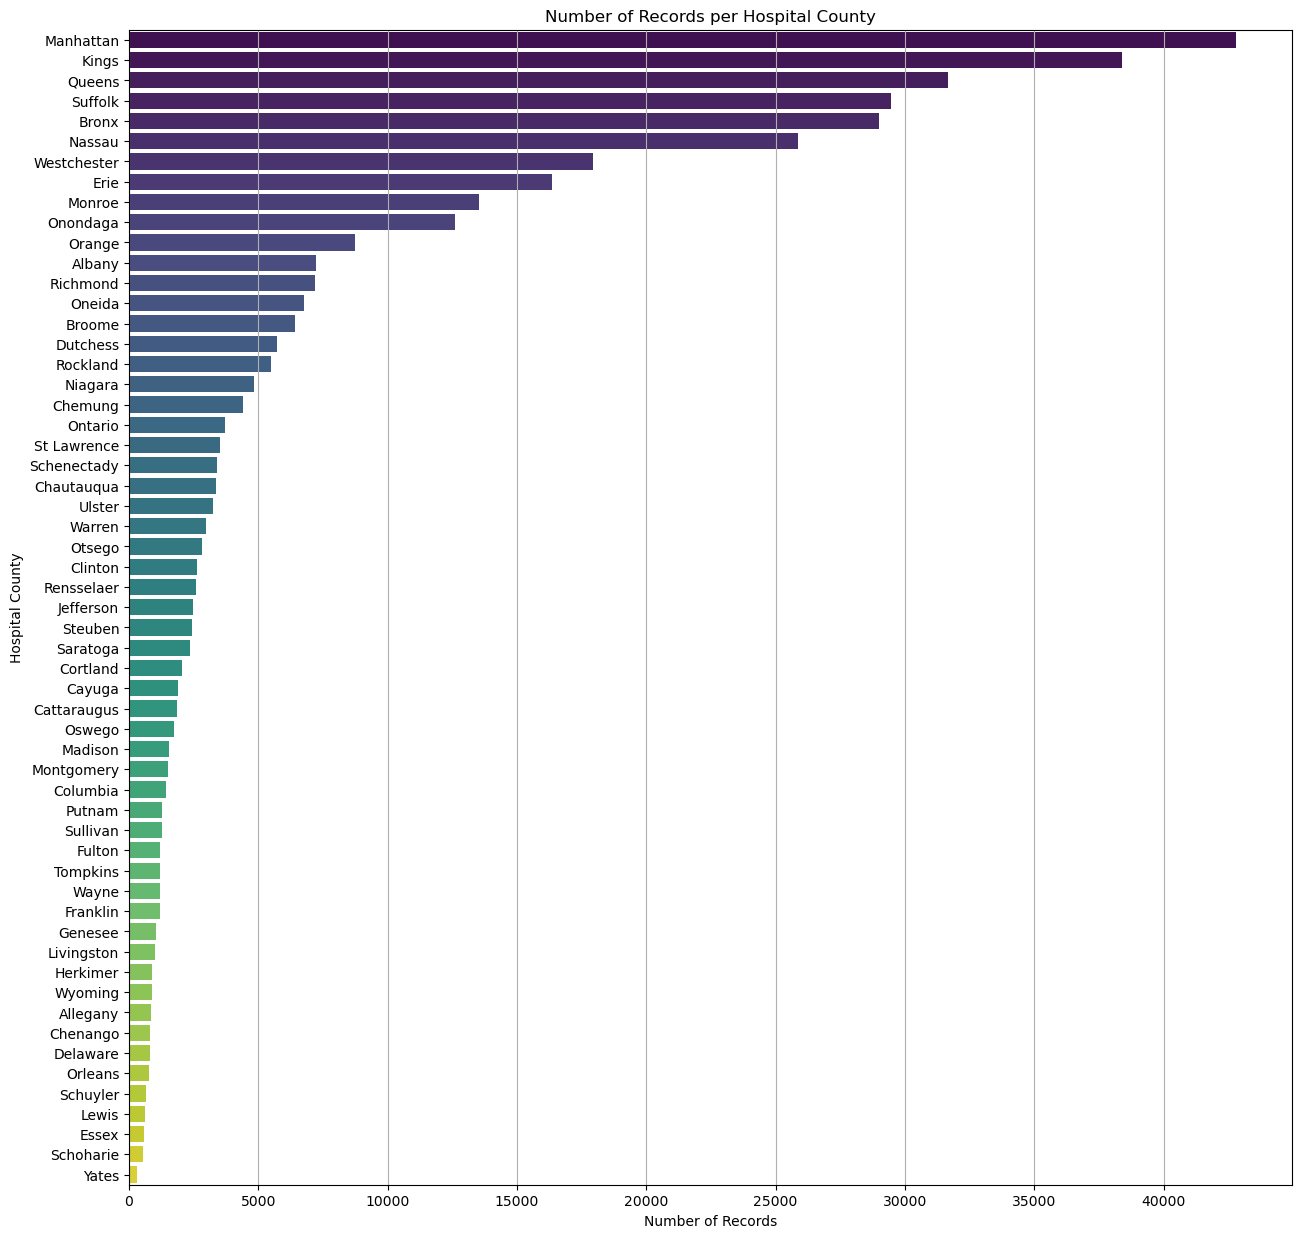

In [39]:
# Count the number of records per Hospital County
county_counts = df['Hospital County'].value_counts()

# Create a DataFrame for plotting
county_df = pd.DataFrame({'Hospital County': county_counts.index, 'Count': county_counts.values})

# Plot the bar plot
plt.figure(figsize=(15, 15))
sns.barplot(x='Count', y='Hospital County', data=county_df, palette='viridis')
plt.title('Number of Records per Hospital County')
plt.xlabel('Number of Records')
plt.ylabel('Hospital County')
plt.grid(axis='x')
plt.show()


Manhattan County has the highest number of records, while Yates County has the lowest number of records.

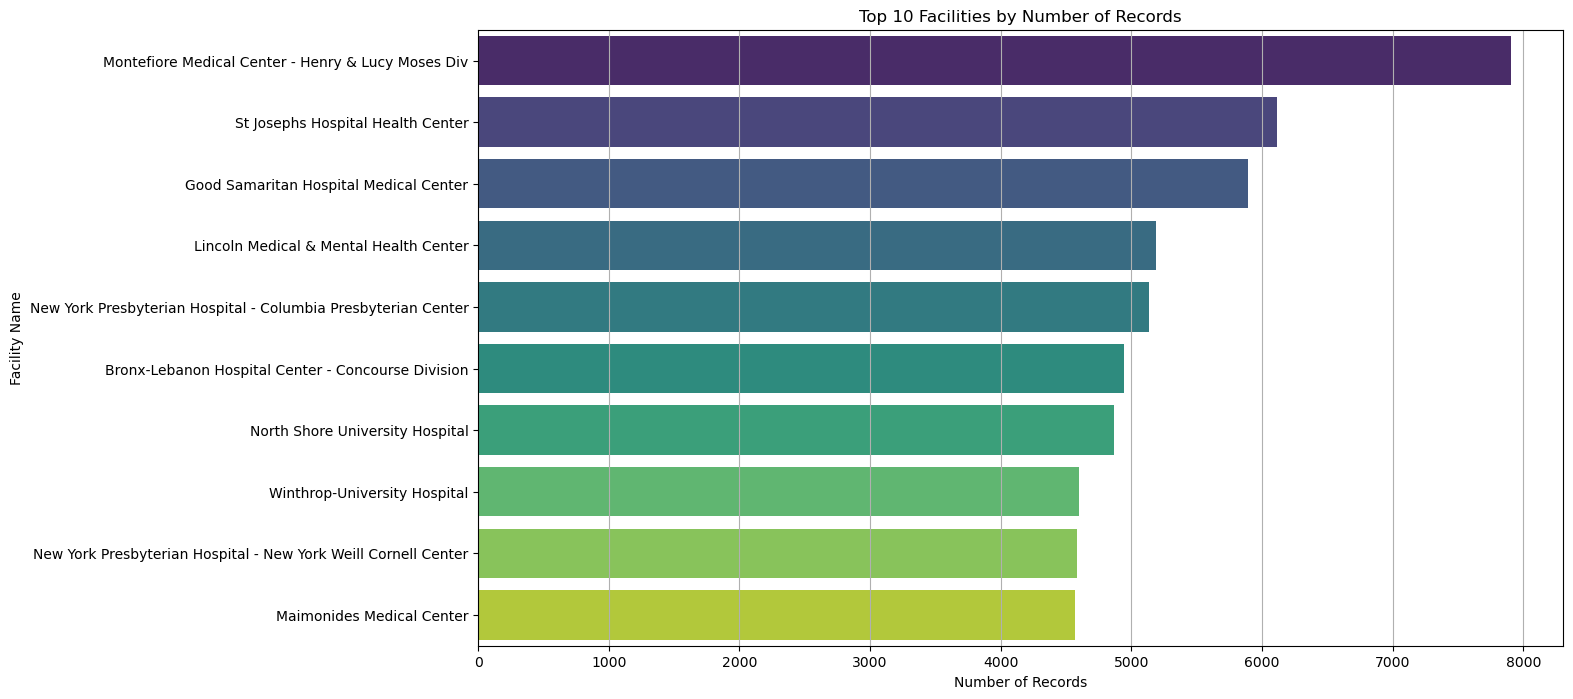

In [40]:
# Count the number of records per Facility Name
facility_counts = df['Facility Name'].value_counts()

# Create a DataFrame for plotting
facility_df = pd.DataFrame({'Facility Name': facility_counts.index, 'Count': facility_counts.values})

top_n = facility_df.head(10)

# Plot the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Facility Name', data=top_n, palette='viridis')
plt.title(f'Top 10 Facilities by Number of Records')
plt.xlabel('Number of Records')
plt.ylabel('Facility Name')
plt.grid(axis='x')
plt.show()

The graph shows the top 10 facilities based on the number of records, with Montefiore Medical Center having the highest number of records.

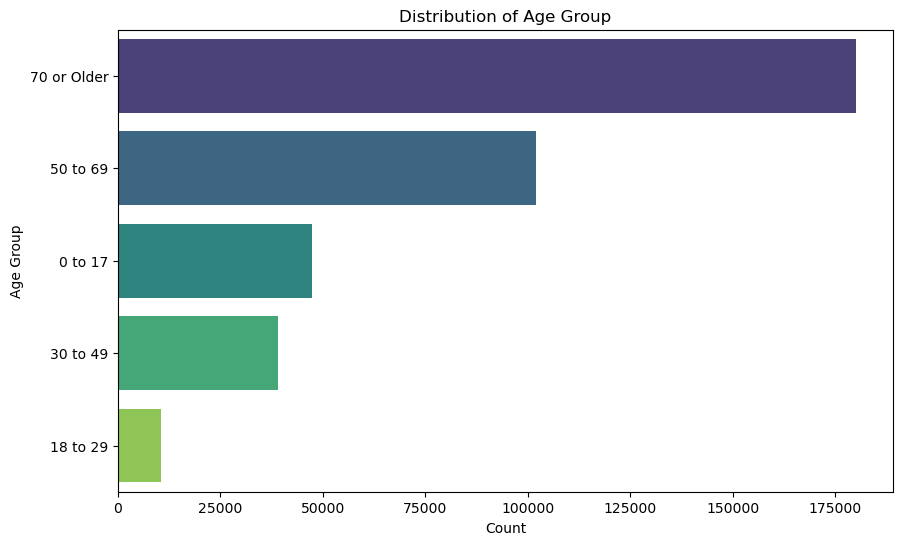

In [41]:
# Age group distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Age Group'], order=df['Age Group'].value_counts().index, palette="viridis")
plt.title('Distribution of Age Group')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

The most prevelant age group in our data set is 70 or older

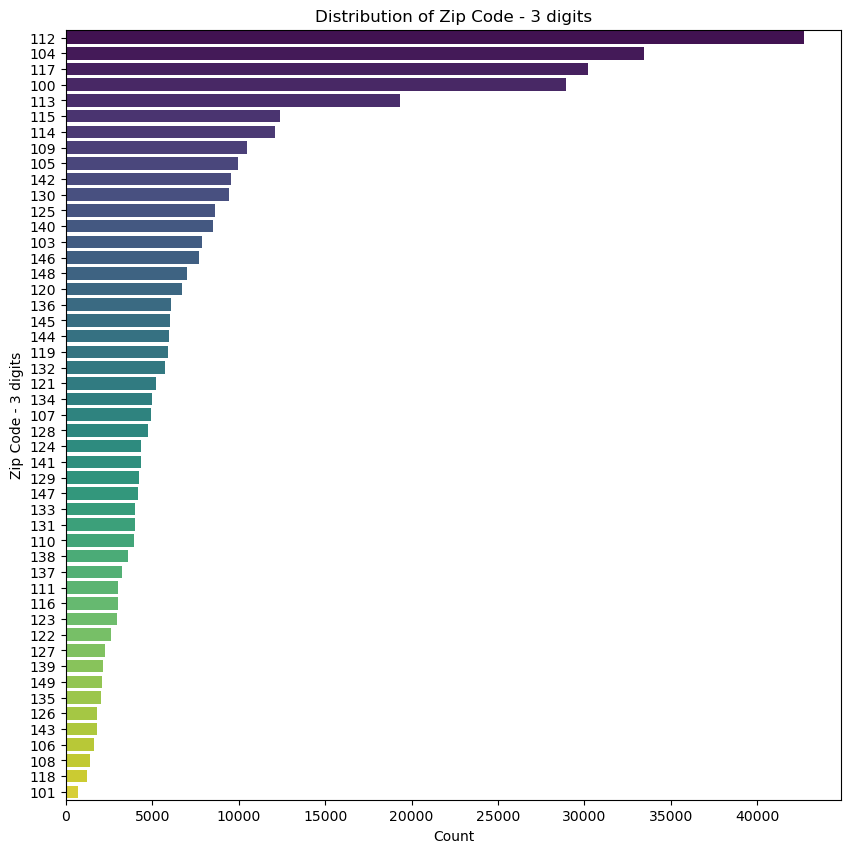

In [42]:
# Zip Code distribution 
plt.figure(figsize=(10, 10))
sns.countplot(y=df['Zip Code - 3 digits'], order=df['Zip Code - 3 digits'].value_counts().index, palette="viridis")
plt.title('Distribution of Zip Code - 3 digits')
plt.xlabel('Count')
plt.ylabel('Zip Code - 3 digits')
plt.show()

The most prevelant Zip Code is 122

In [43]:
# Age distribution
# Calculate counts for each category
gender_counts = df['Gender'].value_counts()

# Print the counts
print("Gender Distribution:")
for gender, count in gender_counts.items():
    print(f"{gender}: {count}")

Gender Distribution:
F: 192456
M: 186581
U: 3


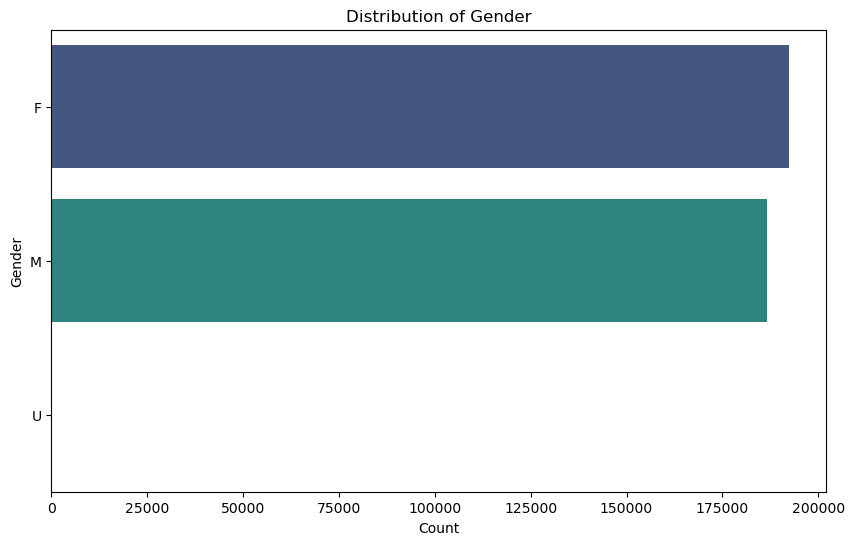

In [44]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Gender'], order=df['Gender'].value_counts().index, palette="viridis")
plt.title('Distribution of Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

- F stands for Female, M stands for Male and U stands for Unknown

- The dataset shows that females have a higher representation compared to males, with 192,456 females and 186,581 males. The difference between the number of females and males is 5,875. The very small number of unknown entries (3) indicates that gender data is largely available and well-documented.

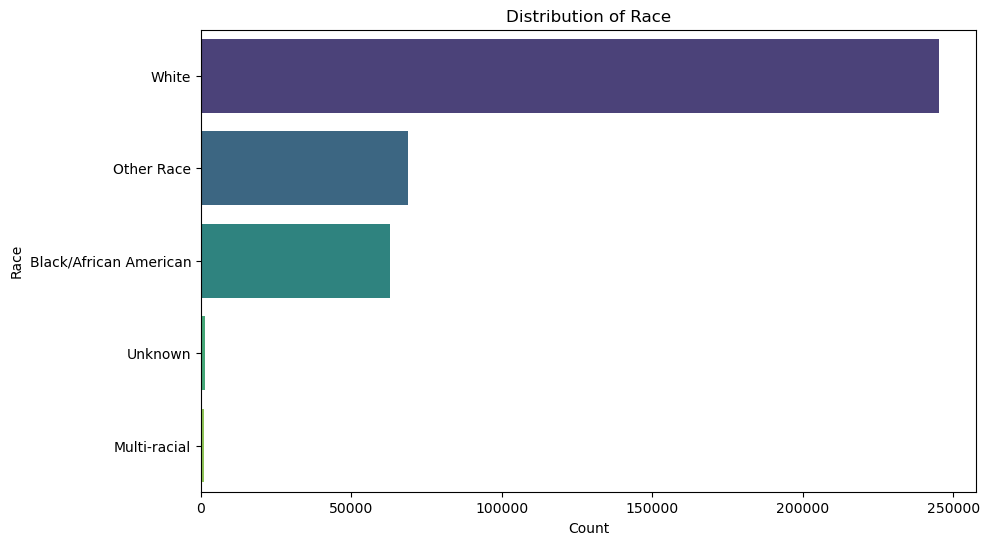

In [45]:
# Race distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Race'], order=df['Race'].value_counts().index, palette="viridis")
plt.title('Distribution of Race')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

The most dominant race in the dataset is White, followed by Other Race, Black/African American, Unknown, and finally Multi-Race.

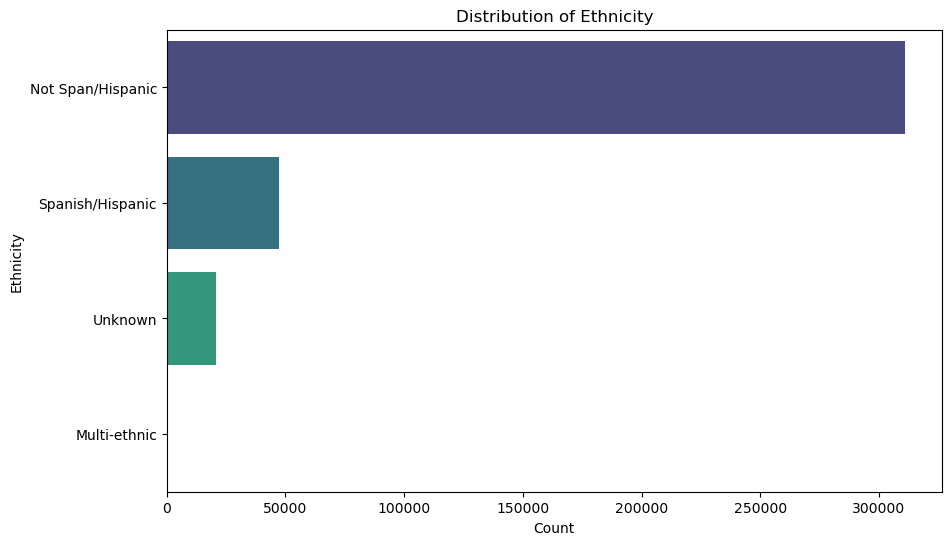

In [46]:
# Ethnicity distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Ethnicity'], order=df['Ethnicity'].value_counts().index, palette="viridis")
plt.title('Distribution of Ethnicity')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.show()

The most dominant race in the dataset is Not Span/Hispanic, followed by Spanish/Hispanic, Unknown, and finally Multi-ethnic.

In [47]:
# Extract the top 10 and bottom 10 Length of Stay values
top_10_los = df['Length of Stay'].value_counts().nlargest(10).index
bottom_10_los = df['Length of Stay'].value_counts().nsmallest(10).index

# Print Top 10 Length of Stay values
print("Top 10 Length of Stay Values and Their Counts:")
top_10_counts = df['Length of Stay'].value_counts().loc[top_10_los]
print(top_10_counts)

# Print Bottom 10 Length of Stay values
print("\nBottom 10 Length of Stay Values and Their Counts:")
bottom_10_counts = df['Length of Stay'].value_counts().loc[bottom_10_los]
print(bottom_10_counts)


Top 10 Length of Stay Values and Their Counts:
Length of Stay
3     62614
2     59645
4     50945
5     38431
1     33253
6     29048
7     23189
8     16728
9     12231
10     9487
Name: count, dtype: int64

Bottom 10 Length of Stay Values and Their Counts:
Length of Stay
106    1
116    1
119    1
93     1
99     1
108    1
112    2
107    2
113    2
105    2
Name: count, dtype: int64


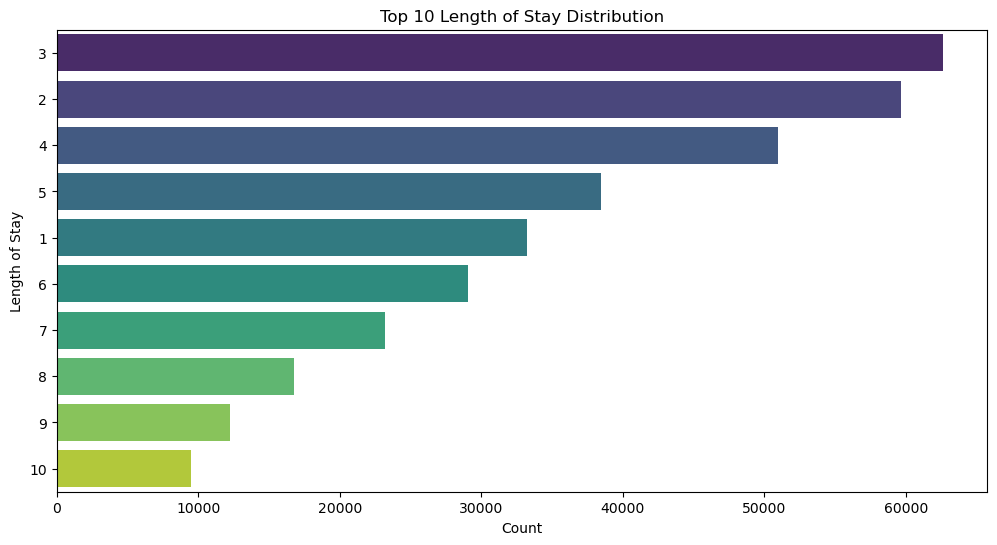

In [48]:
# Filter the DataFrame to include only top 10 lengths of stay
top_10_df = df[df['Length of Stay'].isin(top_10_los)]

# Plot for Top 10 Length of Stay
plt.figure(figsize=(12, 6))
sns.countplot(y='Length of Stay', data=top_10_df, order=top_10_los, palette="viridis")
plt.title('Top 10 Length of Stay Distribution')
plt.xlabel('Count')
plt.ylabel('Length of Stay')
plt.show()

The top 10 lengths of stay predominantly range from 1 to 10 days, with shorter stays being much more common. In contrast, the bottom 10 lengths of stay, which are significantly longer, are rare, indicating that extended stays are exceptional in the dataset.

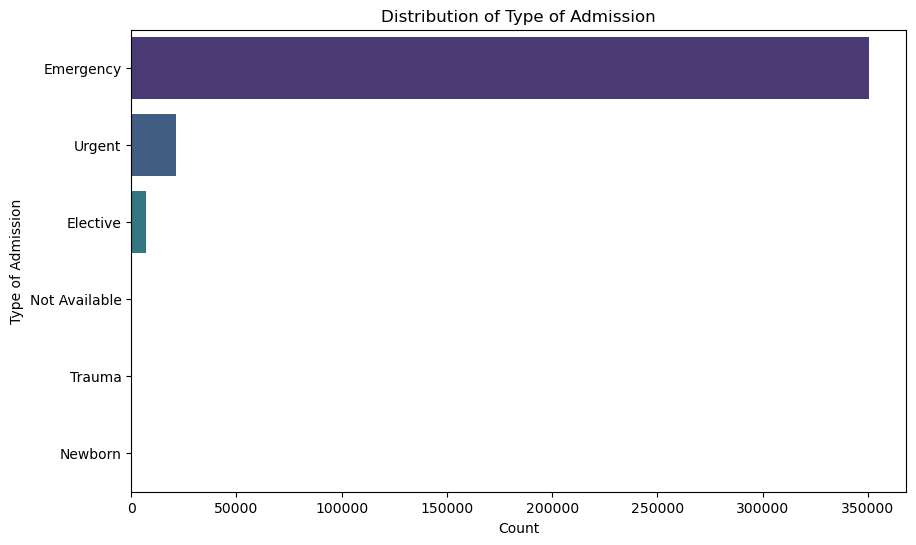

In [49]:
# Type of admission distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Type of Admission'], order=df['Type of Admission'].value_counts().index, palette="viridis")
plt.title('Distribution of Type of Admission')
plt.xlabel('Count')
plt.ylabel('Type of Admission')
plt.show()

The most dominant type of admission in the dataset is Emergenvy, followed by Urgent, Elective, Not Available, Trauma and finally Newborn.

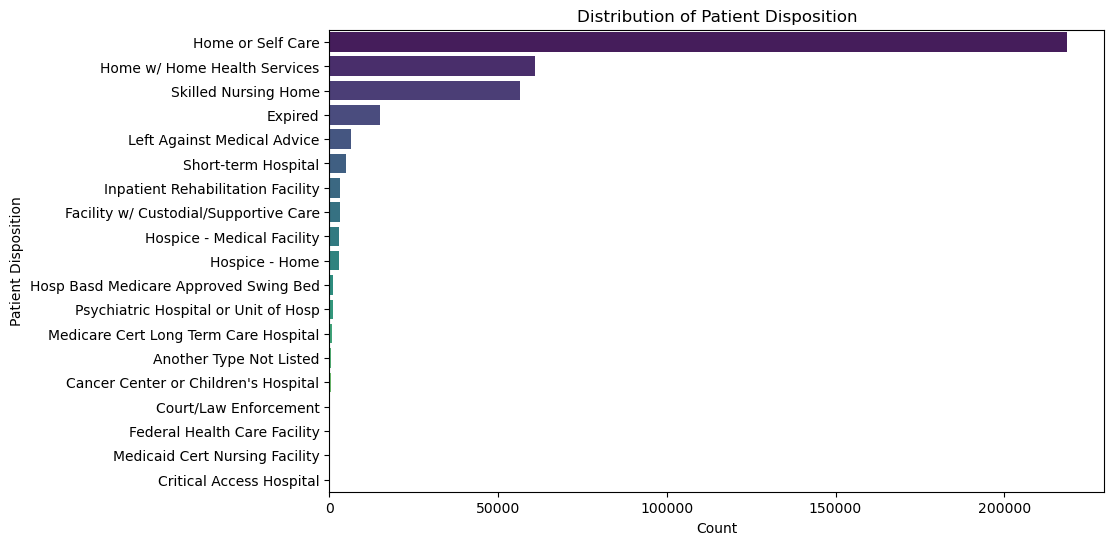

In [50]:
# Patient Disposition 
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Patient Disposition'], order=df['Patient Disposition'].value_counts().index, palette="viridis")
plt.title('Distribution of Patient Disposition')
plt.xlabel('Count')
plt.ylabel('Patient Disposition')
plt.show()

The most dominant patient disposition is Home or Self Care

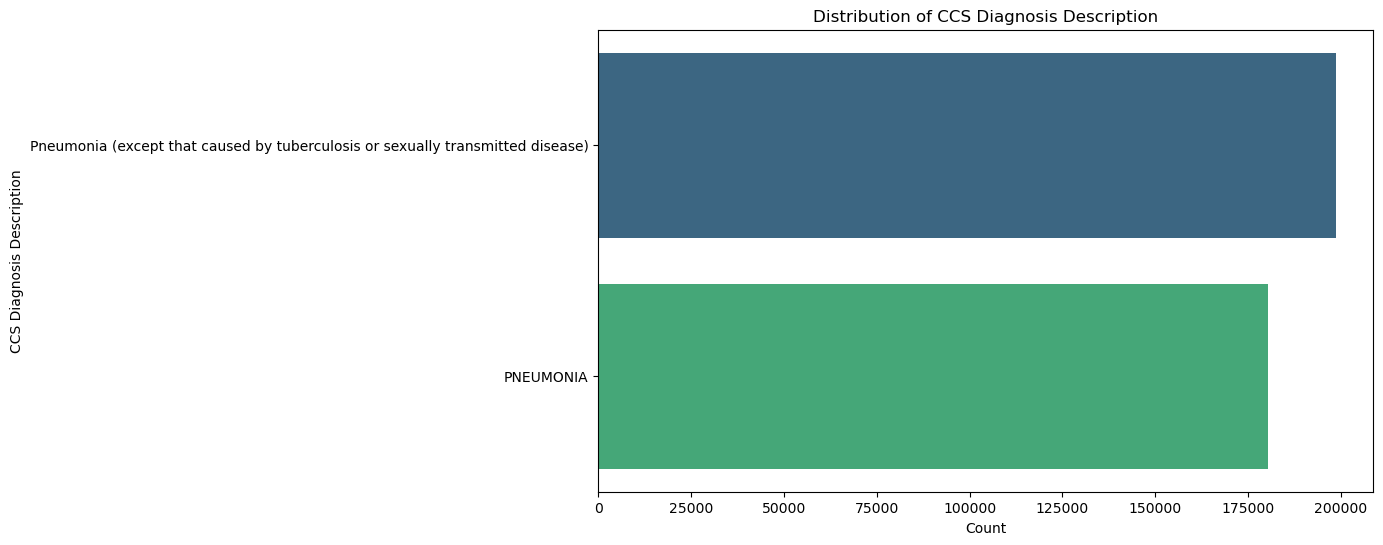

In [51]:
# Distribution of CCS Diagnosis Description
plt.figure(figsize=(10, 6))
sns.countplot(y=df['CCS Diagnosis Description'], order=df['CCS Diagnosis Description'].value_counts().index, palette="viridis")
plt.title('Distribution of CCS Diagnosis Description')
plt.xlabel('Count')
plt.ylabel('CCS Diagnosis Description')
plt.show()

The most dominant CCS diagnosis is Pneumonia that is either caused by tuberculosis or sexually transmitted diseases

In [52]:
# Get the top 10 and bottom 10 CCS Procedure Descriptions
top_10_ccs = df['CCS Procedure Description'].value_counts().head(10).index
bottom_10_ccs = df['CCS Procedure Description'].value_counts().tail(10).index

# Filter the DataFrame for the top 10 CCS Procedure Descriptions
top_10_df = df[df['CCS Procedure Description'].isin(top_10_ccs)]

# Get the count of each CCS Procedure Description in the top 10
top_10_counts = top_10_df['CCS Procedure Description'].value_counts()

# Print the top 10 CCS Procedure Descriptions and their counts
print("Top 10 CCS Procedure Descriptions and Their Counts:")
print(top_10_counts)

# Filter the DataFrame for the bottom 10 CCS Procedure Descriptions
bottom_10_df = df[df['CCS Procedure Description'].isin(bottom_10_ccs)]

# Get the count of each CCS Procedure Description in the bottom 10
bottom_10_counts = bottom_10_df['CCS Procedure Description'].value_counts()

# Print the bottom 10 CCS Procedure Descriptions and their counts
print("\nBottom 10 CCS Procedure Descriptions and Their Counts:")
print(bottom_10_counts)

Top 10 CCS Procedure Descriptions and Their Counts:
CCS Procedure Description
NO PROC                    176546
OTHER THERAPEUTIC PRCS      68144
RESP INTUB/MECH VENTIL      24430
OTHER RESP THERAPY          14283
BLOOD TRANSFUSION            9114
DX BRONCHOSCOPY & BIOPS      7971
CT SCAN CHEST                7673
HEMODIALYSIS                 7547
DX ULTRASOUND HEART          6646
OT VASC CATH; NOT HEART      5529
Name: count, dtype: int64

Bottom 10 CCS Procedure Descriptions and Their Counts:
CCS Procedure Description
MYELOGRAM                  1
LOC EXC LRG INTEST LESN    1
VARI VEIN STRIP;LOW LMB    1
REPAIR RETINAL TEAR        1
FETAL MONITORING           1
MASTECTOMY                 1
HYSTERECTOMY; AB/VAG       1
EXC OF SEMI CART KNEE      1
OT PRCS TO ASSIST DELIV    1
UNGROUPABLE                1
Name: count, dtype: int64


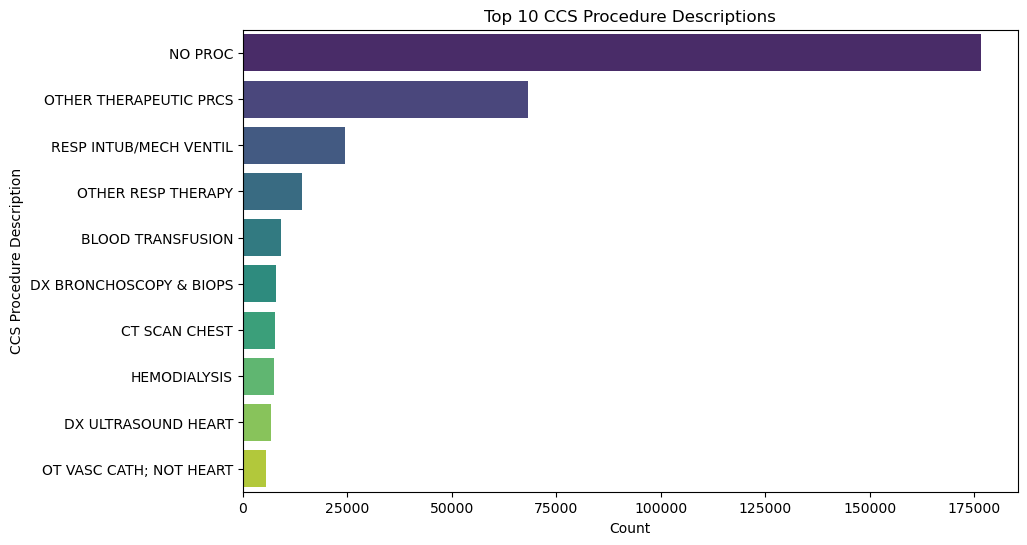

In [53]:
# Plot the top 10 CCS Procedure Descriptions
plt.figure(figsize=(10, 6))
sns.countplot(y=df['CCS Procedure Description'], order=top_10_ccs, palette="viridis")
plt.title('Top 10 CCS Procedure Descriptions')
plt.xlabel('Count')
plt.ylabel('CCS Procedure Description')
plt.show()

In the dataset, "NO PROC" is the most common CCS Procedure Description, indicating that no procedure was performed in these cases. In contrast, the least common descriptions, each with only one occurrence, include rare or less frequently performed procedures.

In [54]:
# Get the top 10 most frequent APR DRG Descriptions
top_10_apr_drg = df['APR DRG Description'].value_counts().head(10).index

# Filter the DataFrame for the top 10 APR DRG Descriptions
top_10_df = df[df['APR DRG Description'].isin(top_10_apr_drg)]

# Get the bottom 10 least frequent APR DRG Descriptions
bottom_10_apr_drg = df['APR DRG Description'].value_counts().tail(10).index

# Filter the DataFrame for the bottom 10 APR DRG Descriptions
bottom_10_df = df[df['APR DRG Description'].isin(bottom_10_apr_drg)]

# Print the top 10 APR DRG Descriptions and their counts
print("Top 10 APR DRG Descriptions and Their Counts:")
print(top_10_df['APR DRG Description'].value_counts())

# Print the bottom 10 APR DRG Descriptions and their counts
print("\nBottom 10 APR DRG Descriptions and Their Counts:")
print(bottom_10_df['APR DRG Description'].value_counts())

Top 10 APR DRG Descriptions and Their Counts:
APR DRG Description
Other pneumonia                                                174769
OTHER PNEUMONIA                                                159696
Major respiratory infections & inflammations                    12011
MAJOR RESPIRATORY INFECTIONS & INFLAMMATIONS                     8961
RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS      3334
Respiratory system diagnosis w ventilator support 96+ hours      2796
Bronchiolitis & RSV pneumonia                                    1668
BRONCHIOLITIS & RSV PNEUMONIA                                    1227
HIV W ONE SIGNIF HIV COND OR W/O SIGNIF RELATED COND             1131
HIV w major HIV related condition                                 888
Name: count, dtype: int64

Bottom 10 APR DRG Descriptions and Their Counts:
APR DRG Description
Other infectious & parasitic diseases                         7
BONE MARROW TRANSPLANT                                        2
NEONATE, B

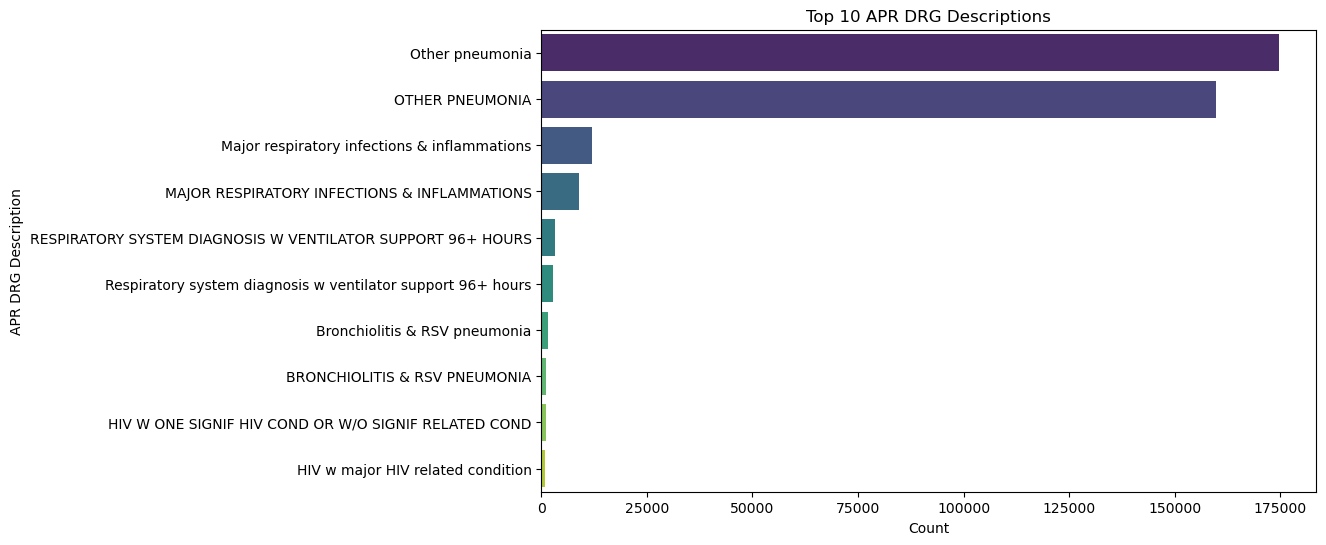

In [55]:
# Plot for the top 10 APR DRG Descriptions
plt.figure(figsize=(10, 6))
sns.countplot(y=top_10_df['APR DRG Description'], order=top_10_apr_drg, palette="viridis")
plt.title('Top 10 APR DRG Descriptions')
plt.xlabel('Count')
plt.ylabel('APR DRG Description')
plt.show()

The top 10 APR DRG descriptions primarily focus on pneumonia and respiratory conditions, with "Other pneumonia" and "OTHER PNEUMONIA" being the most common. Conversely, the bottom 10 descriptions are rare and involve specific or complex procedures such as bone marrow and heart transplants, with counts as low as 1 or 2.

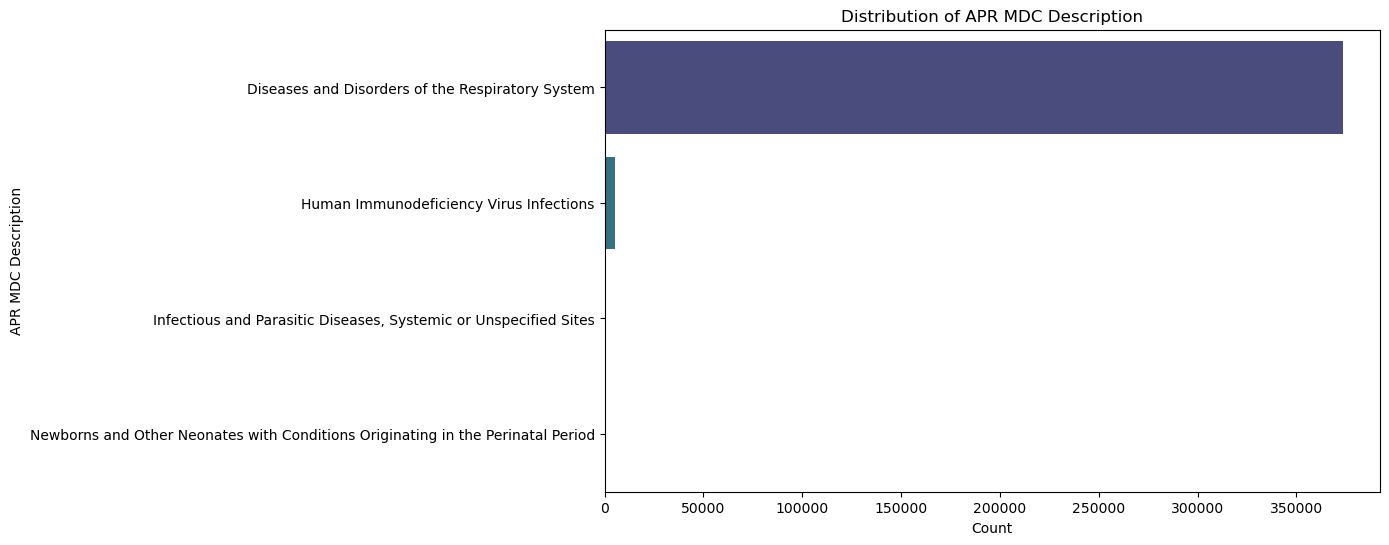

In [56]:
# Distribution of APR MDC Description
plt.figure(figsize=(10, 6))
sns.countplot(y=df['APR MDC Description'], order=df['APR MDC Description'].value_counts().index, palette="viridis")
plt.title('Distribution of APR MDC Description')
plt.xlabel('Count')
plt.ylabel('APR MDC Description')
plt.show()

The most dominant APR MDC Description is Diseases and Disorders of the Respiratory System

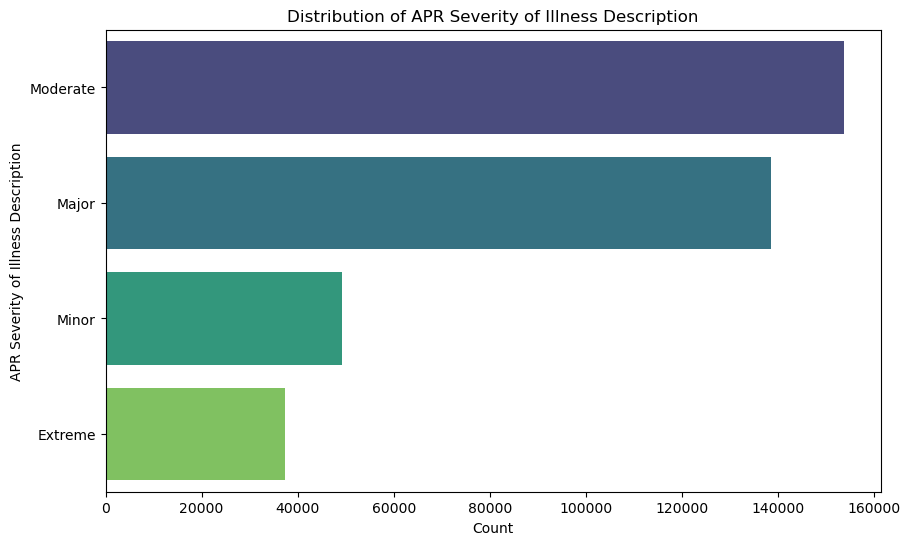

In [57]:
# Distribution of APR Severity of Illness Description
plt.figure(figsize=(10, 6))
sns.countplot(y=df['APR Severity of Illness Description'], order=df['APR Severity of Illness Description'].value_counts().index, palette="viridis")
plt.title('Distribution of APR Severity of Illness Description')
plt.xlabel('Count')
plt.ylabel('APR Severity of Illness Description')
plt.show()

The most dominant severity of illness is moderate followed by major, minor and lastly extreme.

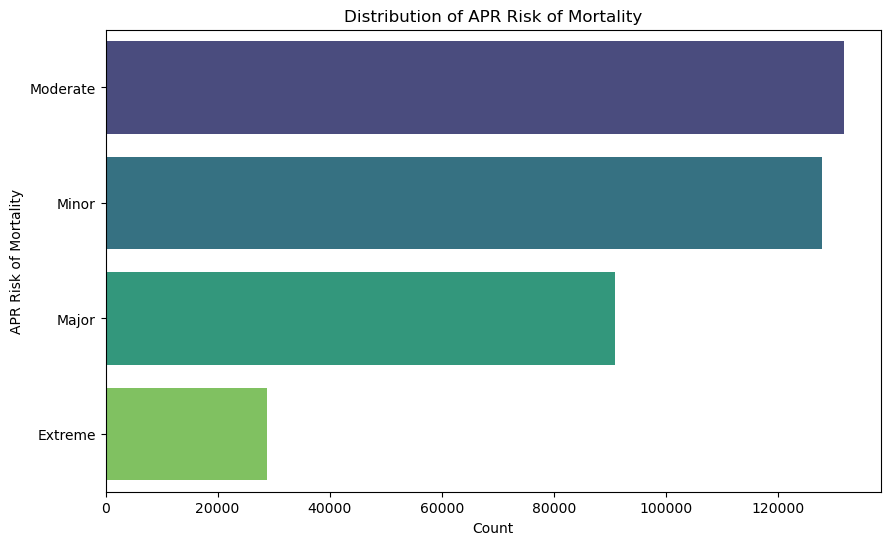

In [58]:
# Distribution of APR Risk of Mortality
plt.figure(figsize=(10, 6))
sns.countplot(y=df['APR Risk of Mortality'], order=df['APR Risk of Mortality'].value_counts().index, palette="viridis")
plt.title('Distribution of APR Risk of Mortality')
plt.xlabel('Count')
plt.ylabel('APR Risk of Mortality')
plt.show()

The most dominant risk of mortality is moderate, followed by minor, then major and finally extreme

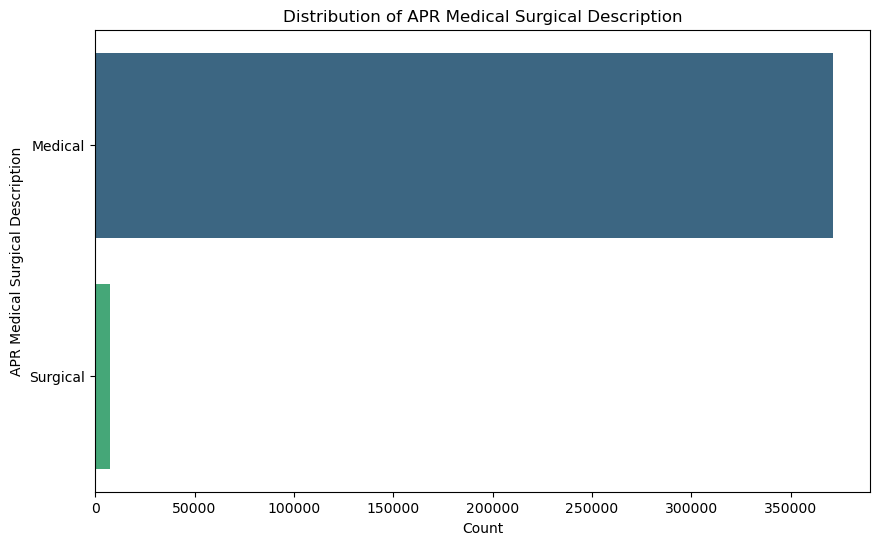

In [59]:
# Distribution of APR Medical Surgical Description
plt.figure(figsize=(10, 6))
sns.countplot(y=df['APR Medical Surgical Description'], order=df['APR Medical Surgical Description'].value_counts().index, palette="viridis")
plt.title('Distribution of APR Medical Surgical Description')
plt.xlabel('Count')
plt.ylabel('APR Medical Surgical Description')
plt.show()

The most dominant Medical Surgical Description is Medical with very few numbers being surgical. 

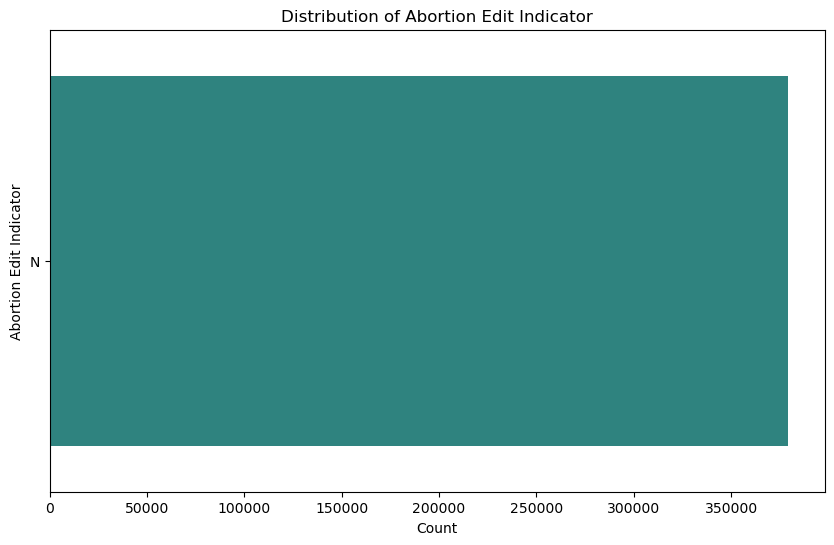

In [60]:
# Distribution of Abortion Edit Indicator
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Abortion Edit Indicator'], order=df['Abortion Edit Indicator'].value_counts().index, palette="viridis")
plt.title('Distribution of Abortion Edit Indicator')
plt.xlabel('Count')
plt.ylabel('Abortion Edit Indicator')
plt.show()

There aren't any abortion indicators in the data set

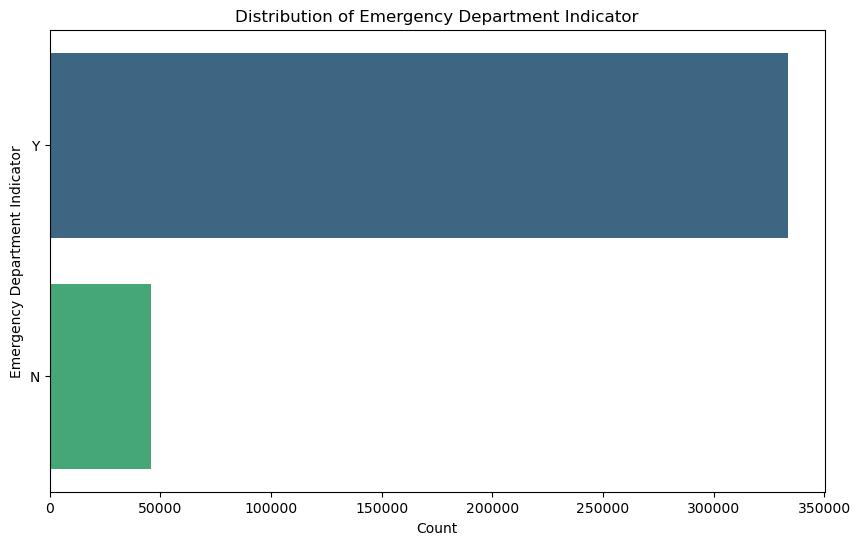

In [61]:
# Distribution of Emergency Department Indicator
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Emergency Department Indicator'], order=df['Emergency Department Indicator'].value_counts().index, palette="viridis")
plt.title('Distribution of Emergency Department Indicator')
plt.xlabel('Count')
plt.ylabel('Emergency Department Indicator')
plt.show()

- Y stands for yes and N stands for no
- There are cases that were indicated as emergencies as compared to those that were not indicated as emergencies.

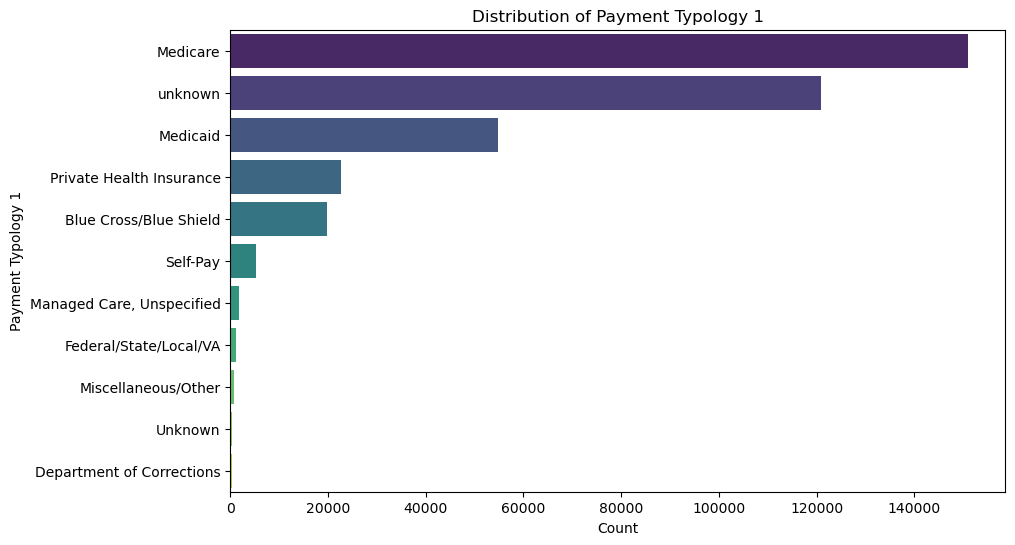

In [62]:
# Distribution of Payment Typology 1
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Payment Typology 1'], order=df['Payment Typology 1'].value_counts().index, palette="viridis")
plt.title('Distribution of Payment Typology 1')
plt.xlabel('Count')
plt.ylabel('Payment Typology 1')
plt.show()

The majority of patients used medicare.

### 3.2 Bivariate Analysis

### Gender and Age Group

In [63]:
cross_tab = pd.crosstab(df['Gender'], df['Age Group'])
print(cross_tab)

Age Group  0 to 17  18 to 29  30 to 49  50 to 69  70 or Older
Gender                                                       
F            21820      5006     18777     49075        97778
M            25439      5486     20380     53008        82268
U                0         0         0         1            2


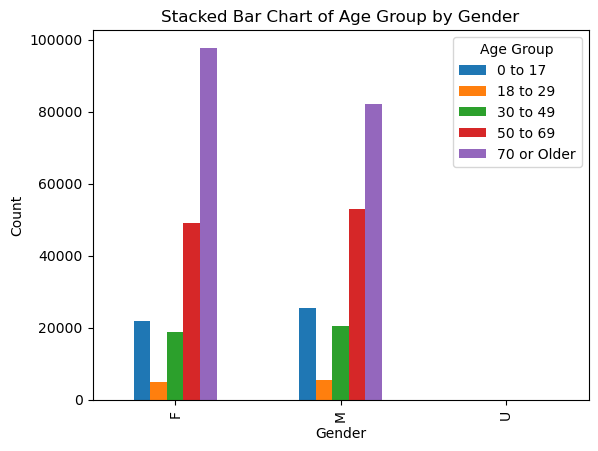

In [64]:
pd.crosstab(df['Gender'], df['Age Group']).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Age Group by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The age distribution shows that both genders have the highest representation in the "70 or Older" category, with females (97,749) and males (82,243) being predominant. In the younger age groups, males and females are more evenly distributed, but females have higher counts across all age groups compared to males, except for the "0 to 17" category where males slightly exceed females. The unknown gender category is negligible.

### Gender and Type of Admission

In [65]:
# Contingency table
cat_col1 = 'Gender'
cat_col2 = 'Type of Admission'
contingency_table = pd.crosstab(df[cat_col1], df[cat_col2])
print(contingency_table)


Type of Admission  Elective  Emergency  Newborn  Not Available  Trauma  Urgent
Gender                                                                        
F                      3532     178146        4             64      13   10697
M                      3620     172438       10             49      19   10445
U                         0          3        0              0       0       0


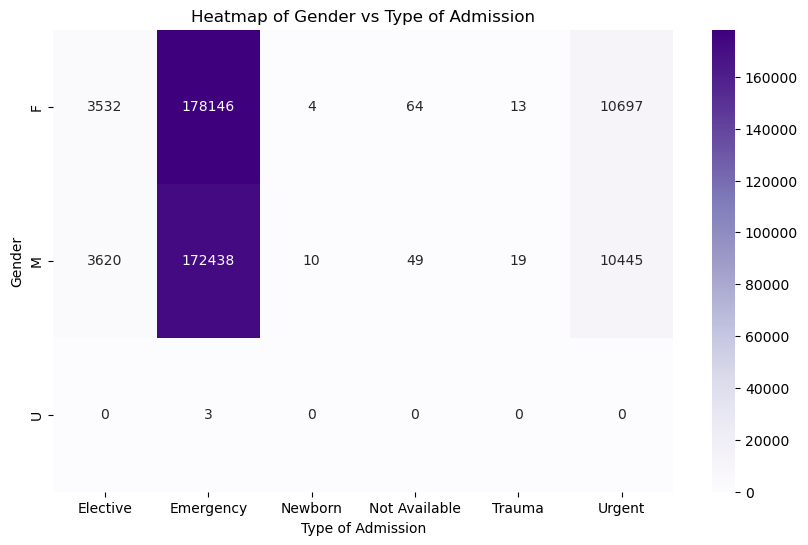

In [66]:
# Visualize the contingency table with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Purples')
plt.title(f'Heatmap of {cat_col1} vs {cat_col2}')
plt.xlabel(cat_col2)
plt.ylabel(cat_col1)
plt.show()

1. Emergency Admissions:
Emergency admissions are the most common type of admission for both genders. The number of emergency admissions for females (178,058) is slightly higher than for males (172,353).

2. Elective Admissions:
Elective admissions are the second most common type. The number of elective admissions is quite similar between females (3,531) and males (3,620).

3. Urgent Admissions:
Urgent admissions are significant but much lower than emergency admissions. The number of urgent admissions for females (10,694) is slightly higher than for males (10,441).

4. Newborn Admissions:
Very few newborn admissions are recorded. Slightly more males (10) than females (4) are admitted as newborns.

5. Not Available:
A small number of admissions are categorized as "Not Available." More females (64) than males (49) fall into this category.

6. Trauma Admissions:
Trauma admissions are the least common type. Slightly more males (19) than females (13) are admitted for trauma.

7. Unknown Gender (U):
There are very few cases where gender is not specified (U), with only 3 emergency admissions recorded and no admissions in other categories.

### Gender and Race

In [67]:
# Create the contingency table
contingency_table = pd.crosstab(df['Race'], df['Gender'])

# Print the contingency table
print(contingency_table)

Gender                       F       M  U
Race                                     
Black/African American   32982   29714  2
Multi-racial               491     495  0
Other Race               33551   35145  0
Unknown                    718     732  0
White                   124714  120495  1


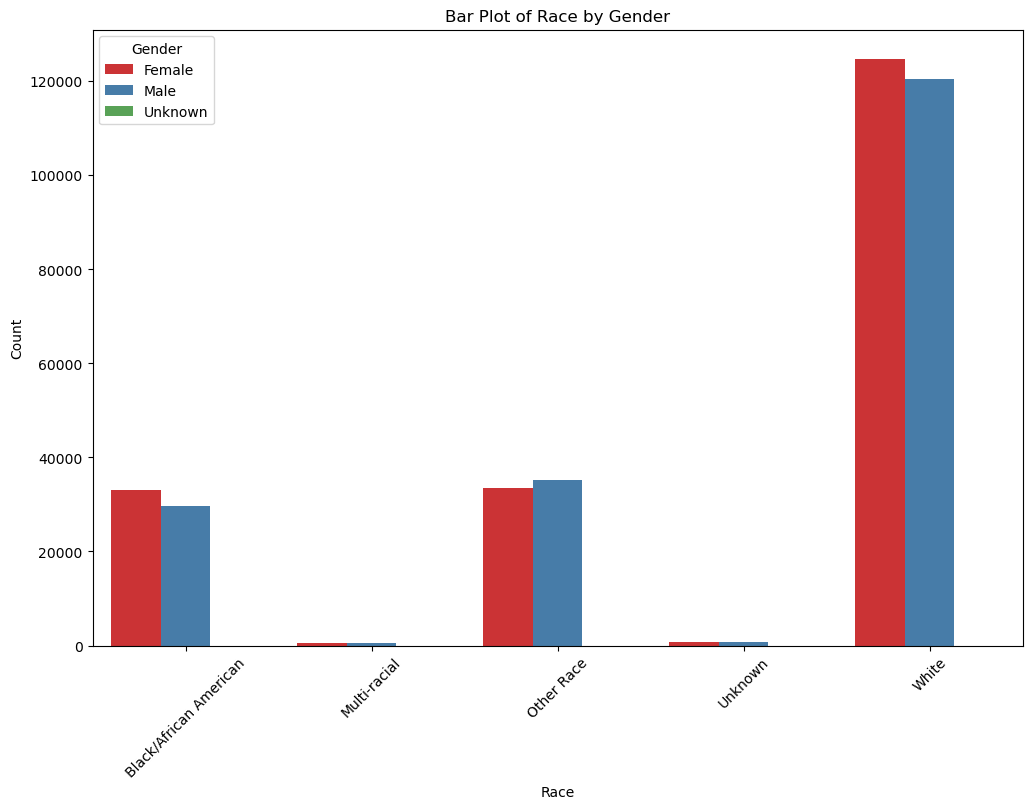

In [68]:
# Melt the data for plotting
race_gender_df = pd.melt(contingency_table.reset_index(), id_vars='Race', var_name='Gender', value_name='Count')

# Plot the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Race', y='Count', hue='Gender', data=race_gender_df, palette='Set1')
plt.title('Bar Plot of Race by Gender')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Change the legend labels
handles, labels = ax.get_legend_handles_labels()
labels = ['Female' if label == 'F' else 'Male' if label == 'M' else 'Unknown' for label in labels]
ax.legend(handles=handles, labels=labels, title='Gender')

plt.show()

- Black/African American and White races have the highest counts in the dataset, with White individuals being the most prevalent overall.
- Other Race has a significant presence but is lower than Black/African American and White categories.
- Multi-racial and Unknown categories have the lowest counts.
- Gender distribution varies across different races, with some races having higher counts for females and others for males.

### Gender and Ethnicity 

In [69]:
# Create the contingency table
contingency_table_ethnicity = pd.crosstab(df['Ethnicity'], df['Gender'])

# Print the contingency table
print(contingency_table_ethnicity)

Gender                  F       M  U
Ethnicity                           
Multi-ethnic          142     149  0
Not Span/Hispanic  157942  152932  2
Spanish/Hispanic    24059   23236  0
Unknown             10313   10264  1


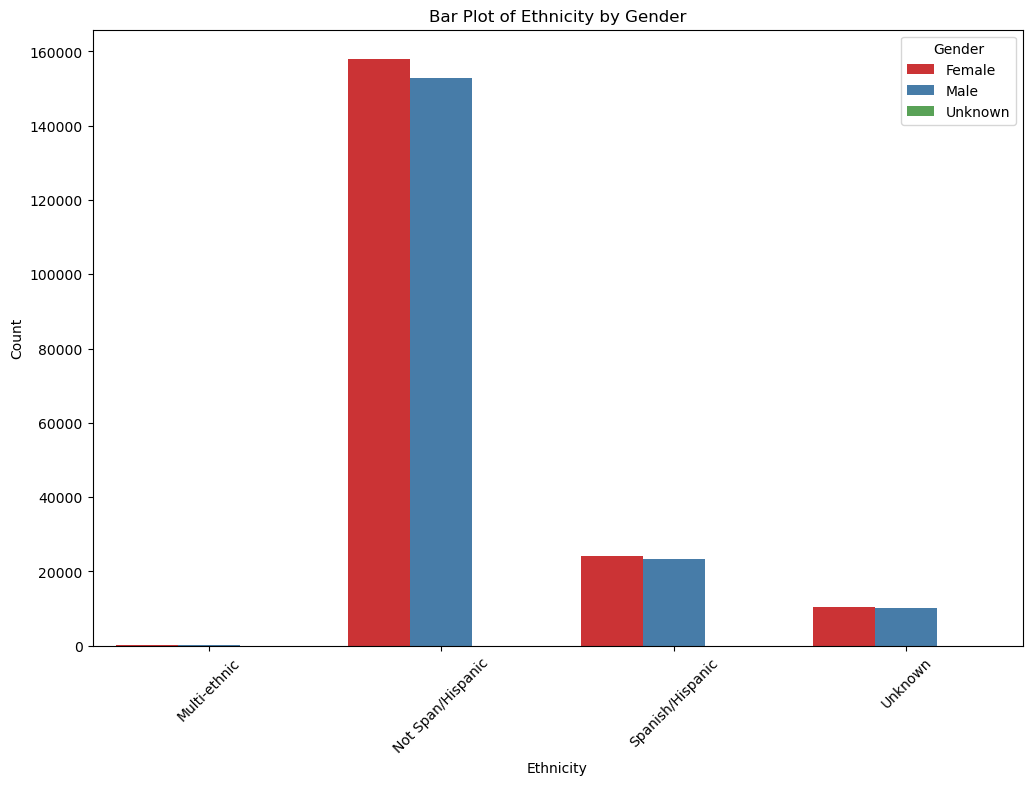

In [70]:
# Melt the data for plotting
ethnicity_gender_df = pd.melt(contingency_table_ethnicity.reset_index(), id_vars='Ethnicity', var_name='Gender', value_name='Count')

# Plot the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Ethnicity', y='Count', hue='Gender', data=ethnicity_gender_df, palette='Set1')
plt.title('Bar Plot of Ethnicity by Gender')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Change the legend labels
handles, labels = ax.get_legend_handles_labels()
labels = ['Female' if label == 'F' else 'Male' if label == 'M' else 'Unknown' for label in labels]
ax.legend(handles=handles, labels=labels, title='Gender')

plt.show()

- The Not Span/Hispanic category has the largest number of individuals, with more females than males.
- Spanish/Hispanic and Unknown categories show significant counts, with a higher number of females compared to males.
- Multi-ethnic has the lowest counts among the categories, with a higher count for males compared to females.

### Gender and Length of Stay

In [71]:
# Summary statistics of Length of Stay by Gender
summary_stats = df.groupby('Gender')['Length of Stay'].describe()
print(summary_stats)

         count  unique  top   freq
Gender                            
F       192456     117    3  31854
M       186581     115    3  30759
U            3       2    5      2


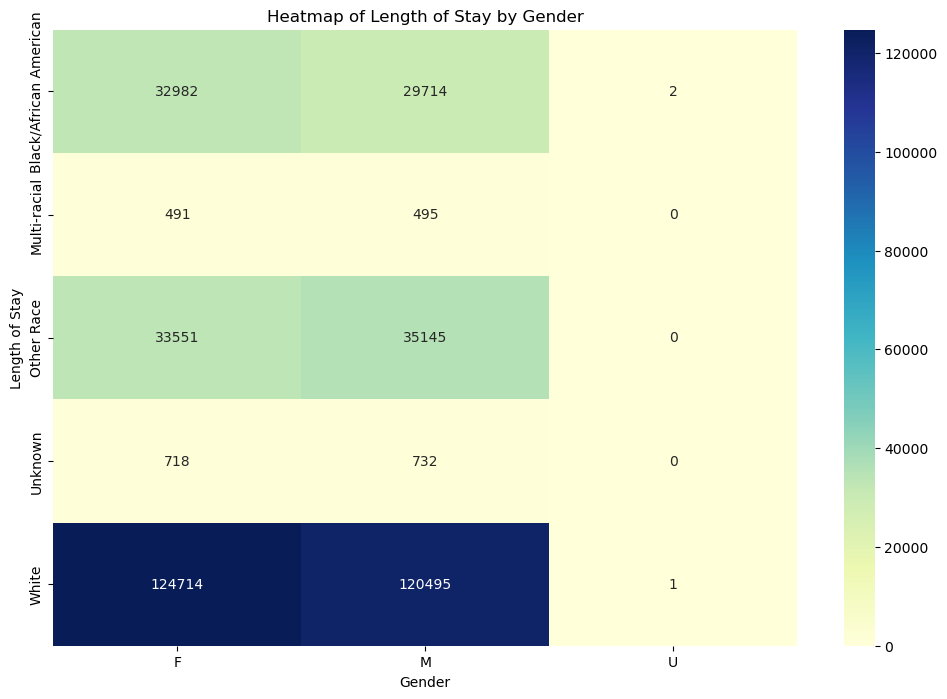

In [72]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Length of Stay by Gender')
plt.xlabel('Gender')
plt.ylabel('Length of Stay')
plt.show()

- Female and Male Patients: Both genders have similar median and 75th percentile lengths of stay, with males having a slightly lower mean length of stay compared to females. The length of stay ranges from 1 to 120 days for both genders.
- Unknown Gender: The mean length of stay for unknown gender is notably higher than that of known genders. However, due to the small sample size, these statistics may not be as reliable.


### Severity of Ilness by Gender

In [73]:
# Create the contingency table
contingency_table_severity_gender = pd.crosstab(df['APR Severity of Illness Description'], df['Gender'])

# Print the contingency table
print(contingency_table_severity_gender)


Gender                                   F      M  U
APR Severity of Illness Description                 
Extreme                              18264  19188  0
Major                                70699  67895  2
Minor                                24534  24782  0
Moderate                             78959  74716  1


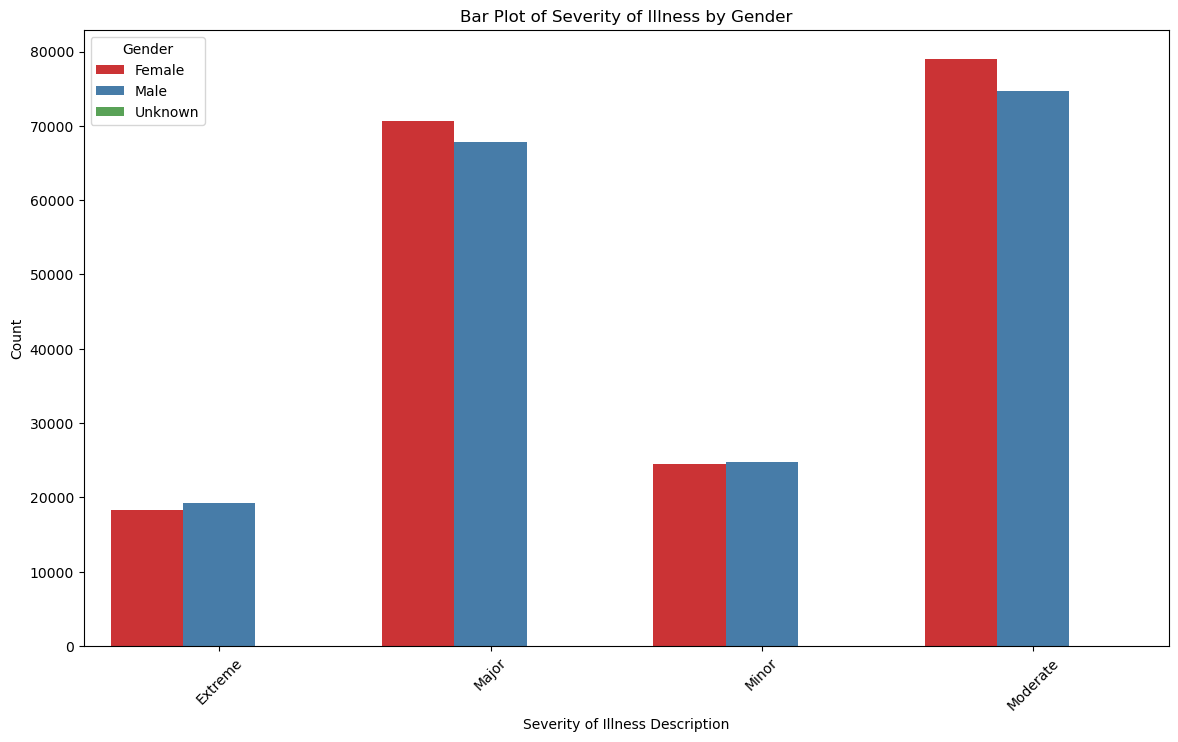

In [74]:
# Melt the data for plotting
severity_gender_df = pd.melt(contingency_table_severity_gender.reset_index(), id_vars='APR Severity of Illness Description', var_name='Gender', value_name='Count')

# Plot the bar plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='APR Severity of Illness Description', y='Count', hue='Gender', data=severity_gender_df, palette='Set1')
plt.title('Bar Plot of Severity of Illness by Gender')
plt.xlabel('Severity of Illness Description')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
labels = ['Female' if label == 'F' else 'Male' if label == 'M' else 'Unknown' for label in labels]
ax.legend(handles=handles, labels=labels, title='Gender')

plt.show()


- Extreme: Nearly equal cases for females (18,264) and males (19,188), with no unknowns.
- Major: Slightly more females (70,699) than males (67,895), with minimal unknowns.
- Minor: Nearly equal counts for both genders, with no unknowns.
- Moderate: More females (78,959) than males (74,716), and a single unknown case.

### Total Charges by Gender

In [75]:
# Calculate the mean total charges for each gender
mean_charges = df.groupby('Gender')['Total Charges'].mean().reindex(['F', 'M', 'U'])
mean_charges.index = ['Female', 'Male', 'Unknown']

# Print the mean total charges
print("Mean Total Charges by Gender:")
print(mean_charges)

Mean Total Charges by Gender:
Female     31501.059716
Male       31934.165540
Unknown    43620.233333
Name: Total Charges, dtype: float64


C:\Users\lydia\AppData\Local\Temp\ipykernel_27960\1859997326.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(x='Gender', y='Total Charges', data=df, estimator='mean', ci='sd', palette='Set1')


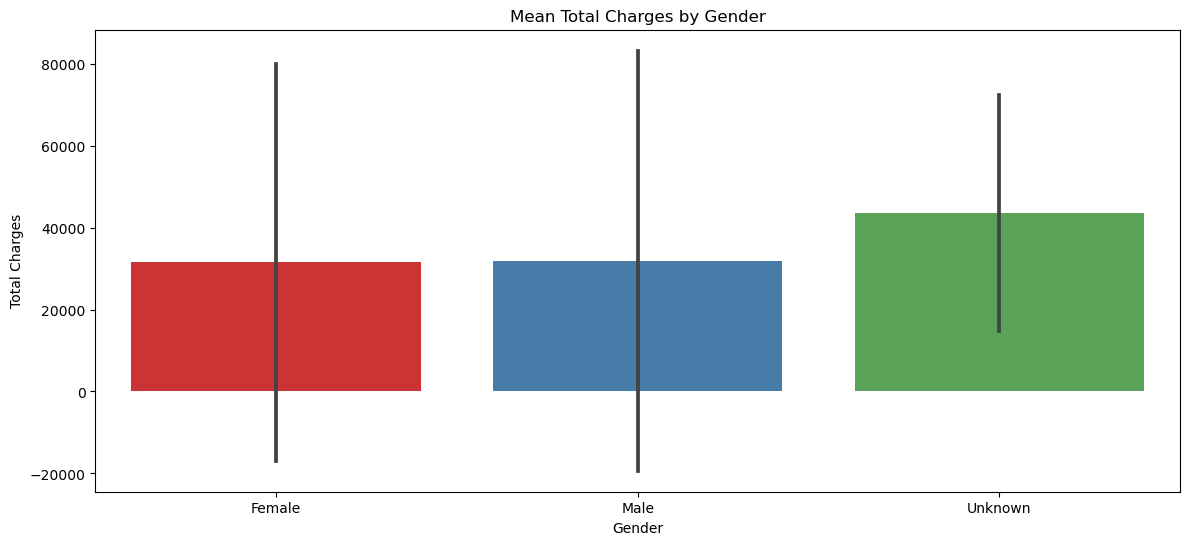

In [76]:
# Plot the bar plot for Mean Total Charges by Gender
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Gender', y='Total Charges', data=df, estimator='mean', ci='sd', palette='Set1')
plt.title('Mean Total Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Charges')

# Set the x-tick positions and labels
xticks = [0, 1,2]  # Positions for 'Female' and 'Male'
xticklabels = ['Female', 'Male', 'Unknown']  # Corresponding labels

# Ensure the number of ticks matches the number of labels
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

plt.show()

This indicates that, on average, males have slightly higher total charges than females. The "Unknown" category has the highest average charges, which could suggest that the charges for these cases might be higher.

### Total Costs by Gender 

In [77]:
# Calculate mean total costs for each gender
mean_total_costs = df.groupby('Gender')['Total Costs'].mean()

# Print mean total costs
print("Mean Total Costs by Gender:")
print(mean_total_costs)

Mean Total Costs by Gender:
Gender
F    11289.846115
M    11599.863155
U    13765.136667
Name: Total Costs, dtype: float64


C:\Users\lydia\AppData\Local\Temp\ipykernel_27960\112189376.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(x='Gender', y='Total Costs', data=df, estimator='mean', ci='sd', palette='Set1')


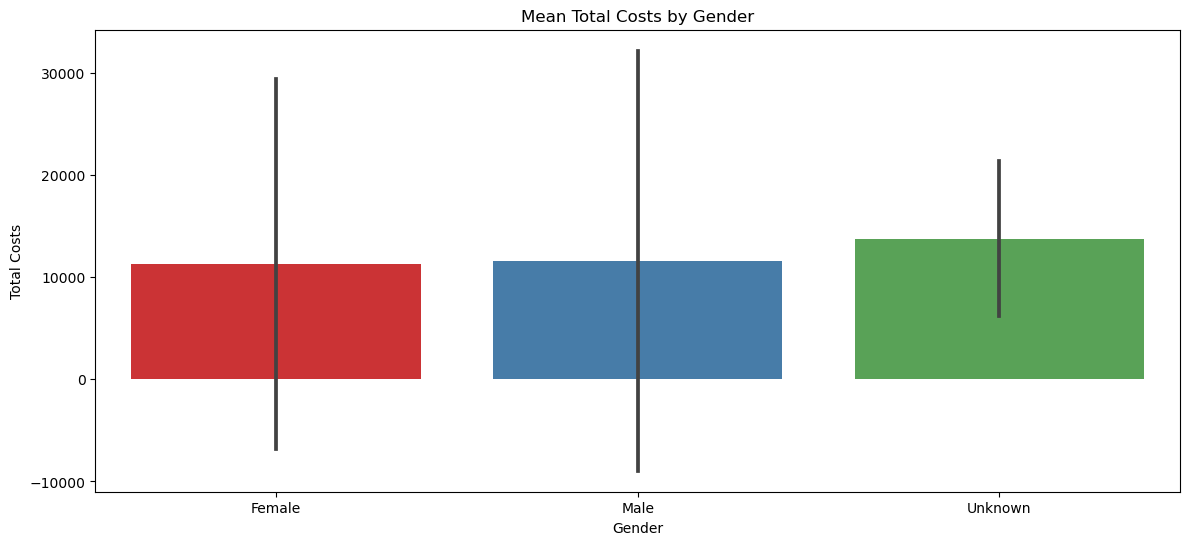

In [78]:
# Plot the bar plot for Mean Total Costs by Gender
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Gender', y='Total Costs', data=df, estimator='mean', ci='sd', palette='Set1')
plt.title('Mean Total Costs by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Costs')

# Set the x-tick positions and labels
xticks = [0, 1, 2]  
xticklabels = ['Female', 'Male', 'Unknown']  

# Ensure the number of ticks matches the number of labels
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

plt.show()

- Female: The average total cost for female patients is 11,289.85.
- Male: The average total cost for male patients is slightly higher at 11,599.86.
- Unknown: The average total cost for patients with unknown gender is notably higher at 13,765.14.

### Total Costs by Race

In [79]:
# Calculate the mean total costs by race
mean_total_costs_by_race = df.groupby('Race')['Total Costs'].mean().reset_index()

# Print the mean total costs by race without dollar signs
print("Mean Total Costs by Race:")
for _, row in mean_total_costs_by_race.iterrows():
    print(f"{row['Race']}: {row['Total Costs']:.2f}")

Mean Total Costs by Race:
Black/African American: 12611.10
Multi-racial: 18264.25
Other Race: 12706.95
Unknown: 8393.15
White: 10780.02


C:\Users\lydia\AppData\Local\Temp\ipykernel_27960\174284553.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Race', y='Total Costs', data=df, estimator='mean', ci='sd', palette='Set1')


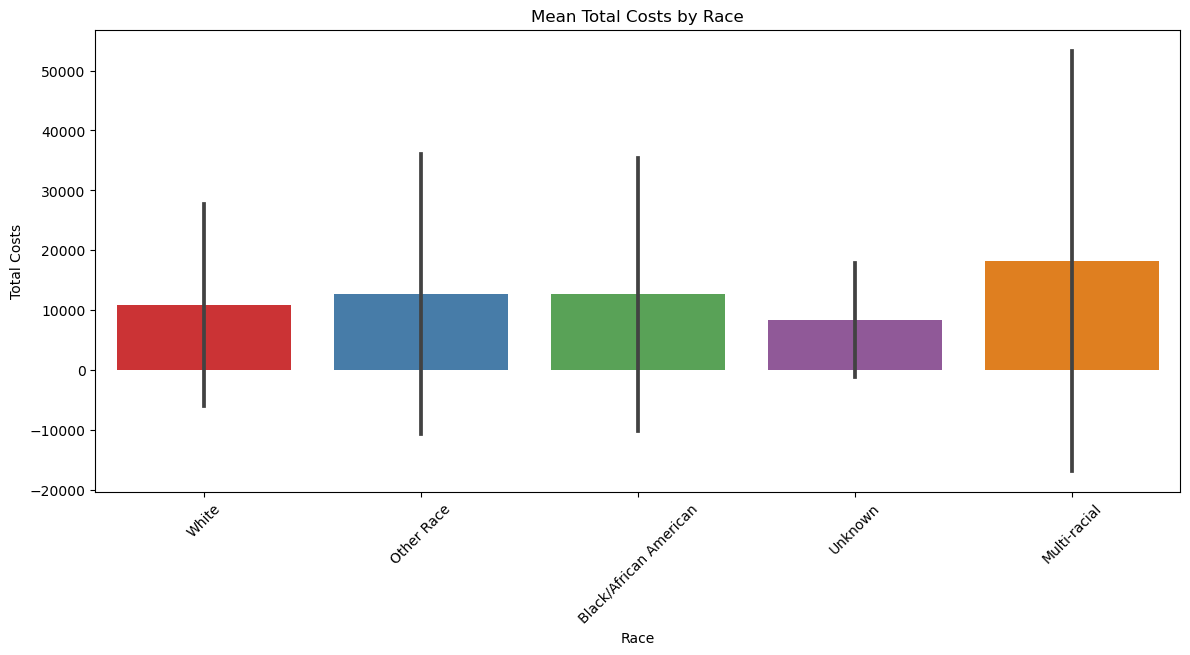

In [80]:
# Plot the bar plot for Mean Total Costs by Race
plt.figure(figsize=(14, 6))
sns.barplot(x='Race', y='Total Costs', data=df, estimator='mean', ci='sd', palette='Set1')
plt.title('Mean Total Costs by Race')
plt.xlabel('Race')
plt.ylabel('Total Costs')
plt.xticks(rotation=45)
plt.show()

- Multi-racial individuals have the highest average total costs at 18,264.25.
- Other Race and Black/African American follow, with mean costs of 12,706.95 and 12,611.10, respectively.
- White individuals have an average cost of 10,780.02.
- Unknown has the lowest average total cost at 8,393.15.

### Total Charges by Race

In [81]:
# Print the mean charges for each race
mean_charges_by_race = df.groupby('Race')['Total Charges'].mean().sort_index()
print(mean_charges_by_race)

Race
Black/African American    32355.752486
Multi-racial              53947.076349
Other Race                32931.985053
Unknown                   25645.032738
White                     31155.718041
Name: Total Charges, dtype: float64


C:\Users\lydia\AppData\Local\Temp\ipykernel_27960\2393323219.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Race', y='Total Charges', data=df, estimator='mean', ci='sd', palette='Set1')


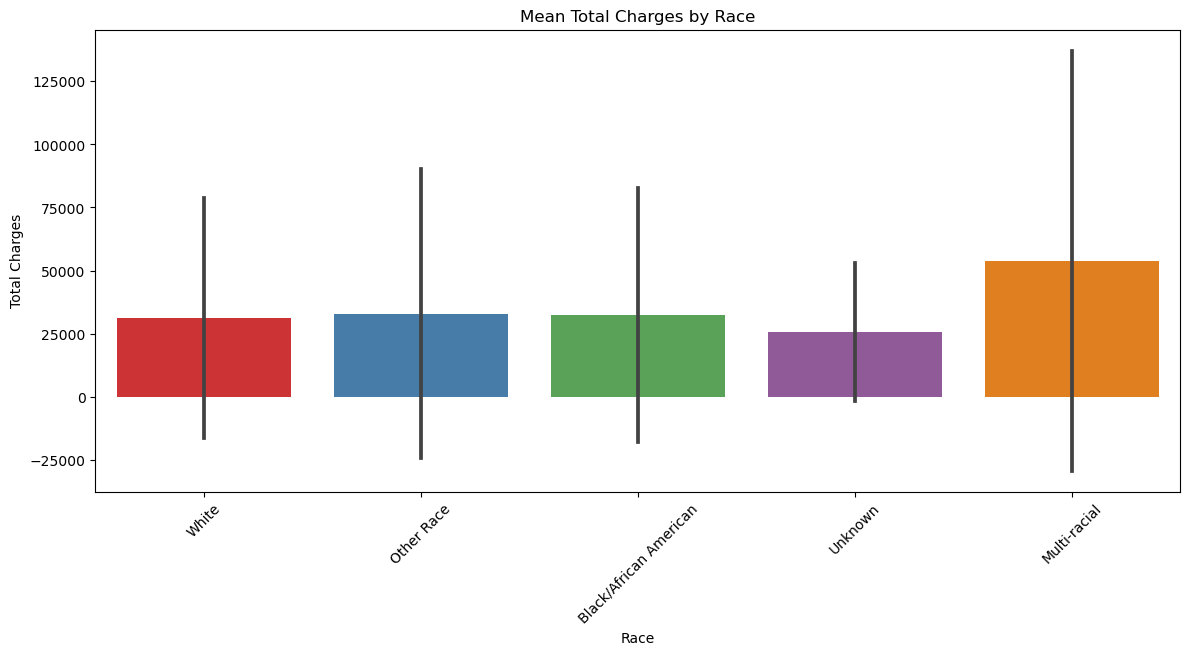

In [82]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Race', y='Total Charges', data=df, estimator='mean', ci='sd', palette='Set1')
plt.title('Mean Total Charges by Race')
plt.xlabel('Race')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.show()

- Multi-racial patients have the highest average total charges, significantly exceeding other groups. 
- Black/African American, Other Race, and White patients have relatively similar mean charges, while Unknown patients have the lowest average charges.

### Total Charges by Ethnicity

In [83]:
# Calculate mean total charges by ethnicity
mean_total_charges_ethnicity = df.groupby('Ethnicity')['Total Charges'].mean()

# Print the results
print(mean_total_charges_ethnicity)

Ethnicity
Multi-ethnic         45712.079450
Not Span/Hispanic    32291.823302
Spanish/Hispanic     31030.917047
Unknown              24363.157377
Name: Total Charges, dtype: float64


C:\Users\lydia\AppData\Local\Temp\ipykernel_27960\2755088832.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Ethnicity', y='Total Charges', data=df, estimator='mean', ci='sd', palette='Set1')


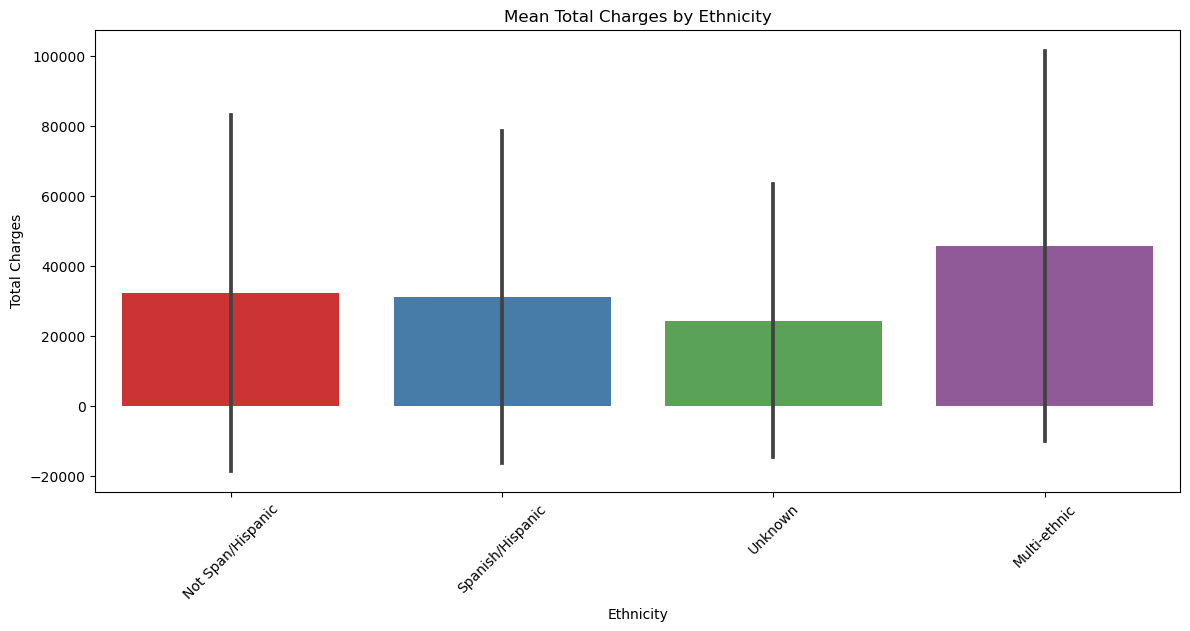

In [84]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Ethnicity', y='Total Charges', data=df, estimator='mean', ci='sd', palette='Set1')
plt.title('Mean Total Charges by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)
plt.show()

This suggests that Multi-ethnic individuals incur the highest average charges, while those with unknown ethnicity have the lowest.

### Total Costs by Ethnicity 

In [85]:
# Calculate mean total costs by ethnicity
mean_total_costs_ethnicity = df.groupby('Ethnicity')['Total Costs'].mean()

# Print the results
print(mean_total_costs_ethnicity)


Ethnicity
Multi-ethnic         16286.988660
Not Span/Hispanic    11516.146090
Spanish/Hispanic     11549.616086
Unknown              10014.673355
Name: Total Costs, dtype: float64


C:\Users\lydia\AppData\Local\Temp\ipykernel_27960\1513240591.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Ethnicity', y='Total Costs', data=df, estimator='mean', ci='sd', palette='Set1')


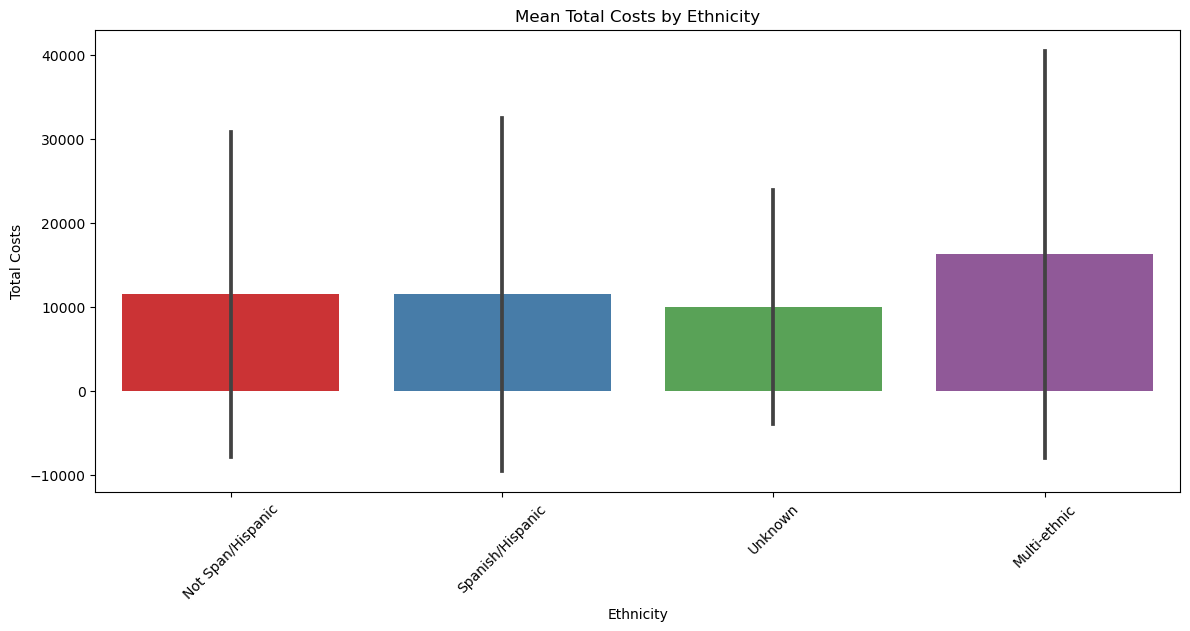

In [86]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Ethnicity', y='Total Costs', data=df, estimator='mean', ci='sd', palette='Set1')
plt.title('Mean Total Costs by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Total Costs')
plt.xticks(rotation=45)
plt.show()

The output indicates that Multi-ethnic individuals have the highest average costs, while those with unknown ethnicity have the lowest.

### APR Risk of Mortality by Gender

In [87]:
# Contingency table for APR Risk of Mortality by Gender
risk_gender_table = pd.crosstab(df['APR Risk of Mortality'], df['Gender'])

print("APR Risk of Mortality by Gender:")
print(risk_gender_table)

APR Risk of Mortality by Gender:
Gender                     F      M  U
APR Risk of Mortality                 
Extreme                14311  14528  0
Major                  45820  45021  2
Minor                  63267  64457  0
Moderate               69058  62575  1


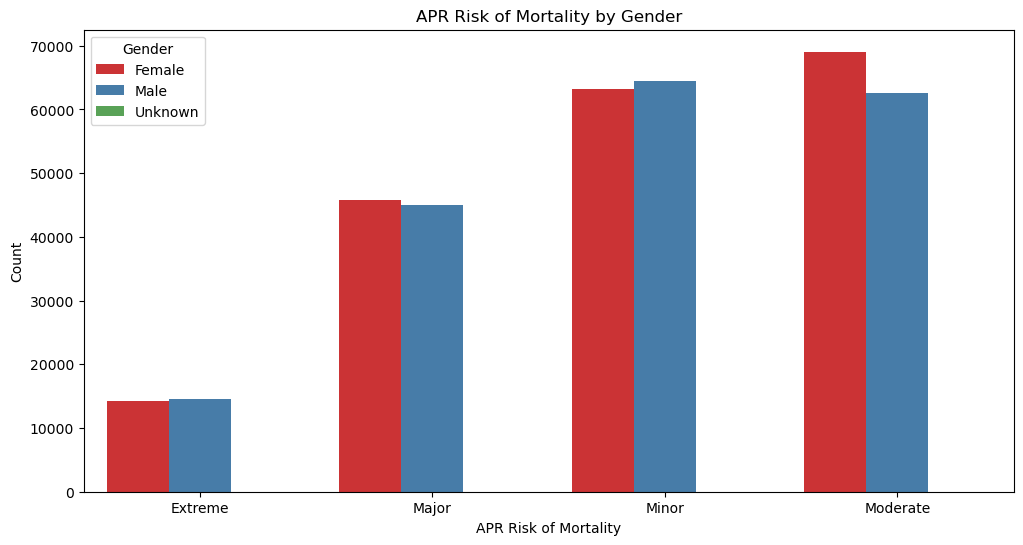

In [88]:
# Melt the data for plotting
risk_gender_df = pd.melt(risk_gender_table.reset_index(), id_vars='APR Risk of Mortality', var_name='Gender', value_name='Count')

# Plot the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='APR Risk of Mortality', y='Count', hue='Gender', data=risk_gender_df, palette='Set1')
plt.title('APR Risk of Mortality by Gender')
plt.xlabel('APR Risk of Mortality')
plt.ylabel('Count')

# Update the legend
handles, labels = ax.get_legend_handles_labels()
labels = ['Female' if label == 'F' else 'Male' if label == 'M' else 'Unknown' for label in labels]
ax.legend(handles=handles, labels=labels, title='Gender')

plt.show()


- Extreme: A small number of patients are categorized as at "Extreme" risk of mortality, with counts being nearly equal for females (14,311) and males (14,528), and no cases listed as "Unknown."
- Major: A moderate number of patients are at "Major" risk, with females (45,820) slightly outnumbering males (45,021), and very few cases listed as "Unknown."
- Minor: A significant number of patients fall into the "Minor" risk category, with counts nearly equal for females (63,267) and males (64,457), and no cases listed as "Unknown."
- Moderate: The largest number of patients are categorized under "Moderate" risk, with females (69,058) exceeding males (62,575), and just one case listed as "Unknown."

### APR Risk of Mortality by Race

In [89]:
# Contingency table for APR Risk of Mortality by Race
risk_race_table = pd.crosstab(df['APR Risk of Mortality'], df['Race'])

print("\nAPR Risk of Mortality by Race:")
print(risk_race_table)


APR Risk of Mortality by Race:
Race                   Black/African American  Multi-racial  Other Race  \
APR Risk of Mortality                                                     
Extreme                                  3765            94        3833   
Major                                   12106           299       12315   
Minor                                   28420           251       33055   
Moderate                                18407           342       19493   

Race                   Unknown  White  
APR Risk of Mortality                  
Extreme                     80  21067  
Major                      256  65867  
Minor                      640  65358  
Moderate                   474  92918  


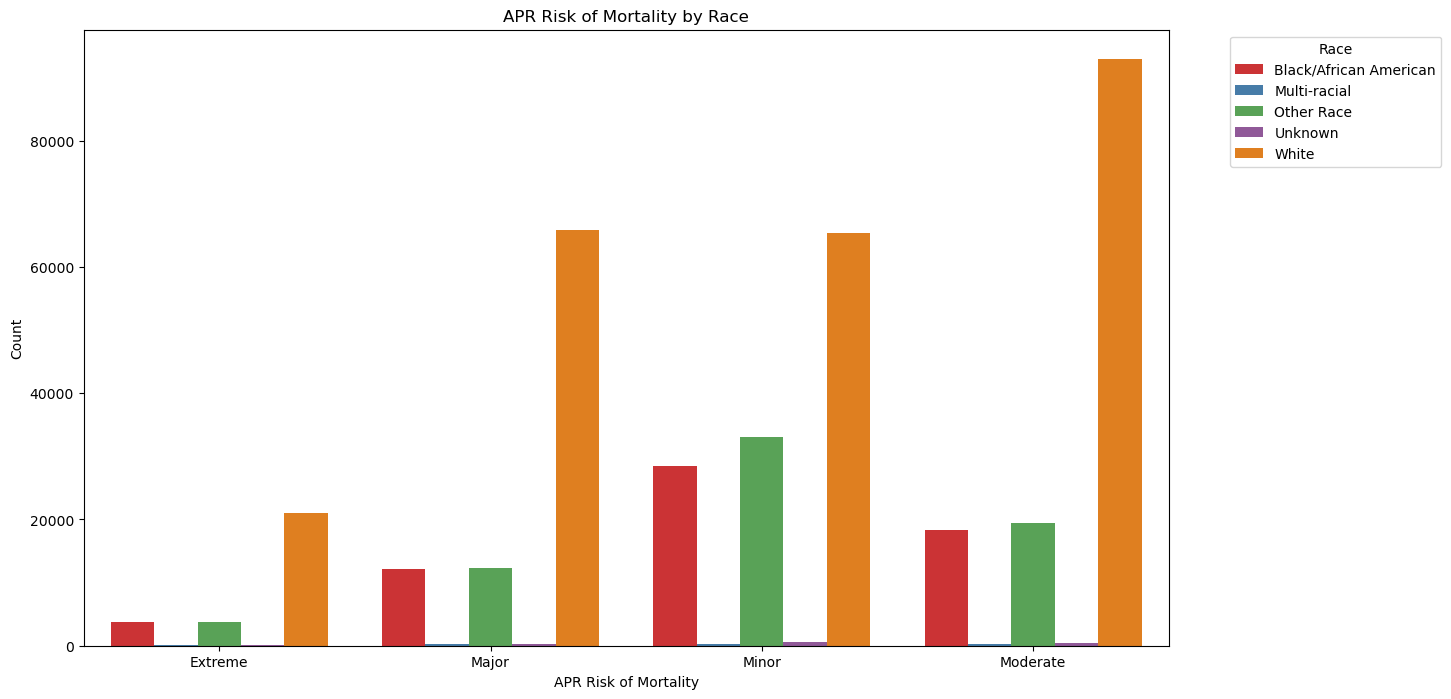

In [90]:
# Melt the data for plotting
risk_race_df = pd.melt(risk_race_table.reset_index(), id_vars='APR Risk of Mortality', var_name='Race', value_name='Count')

# Plot the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='APR Risk of Mortality', y='Count', hue='Race', data=risk_race_df, palette='Set1')
plt.title('APR Risk of Mortality by Race')
plt.xlabel('APR Risk of Mortality')
plt.ylabel('Count')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Extreme Risk: The number of patients at extreme risk is notably low across all races, with the highest counts seen in the White population (21,067) and the lowest in Multi-racial (94).
- Major Risk: The White population has the highest count (65,867), followed by the Black/African American group (12,106). The Multi-racial group has a lower count (299).
- Minor Risk: The White population again has the highest count (65,358), with other races showing lower numbers. The Black/African American group has 28,420, and the Other Race category has 33,055.
- Moderate Risk: The White population has the highest count (92,918), with the Black/African American group at 18,407, and other races like Multi-racial and Other Race showing fewer cases (342 and 19,493, respectively).

### APR Risk of Mortality by Age Group

In [91]:
# Contingency table for APR Risk of Mortality by Age Group
risk_age_table = pd.crosstab(df['APR Risk of Mortality'], df['Age Group'])

print("\nAPR Risk of Mortality by Age Group:")
print(risk_age_table)


APR Risk of Mortality by Age Group:
Age Group              0 to 17  18 to 29  30 to 49  50 to 69  70 or Older
APR Risk of Mortality                                                    
Extreme                    152       231      1051      5863        21542
Major                     1057      1104      4804     21572        62306
Minor                    42588      7150     23941     42209        11836
Moderate                  3462      2007      9361     32440        84364


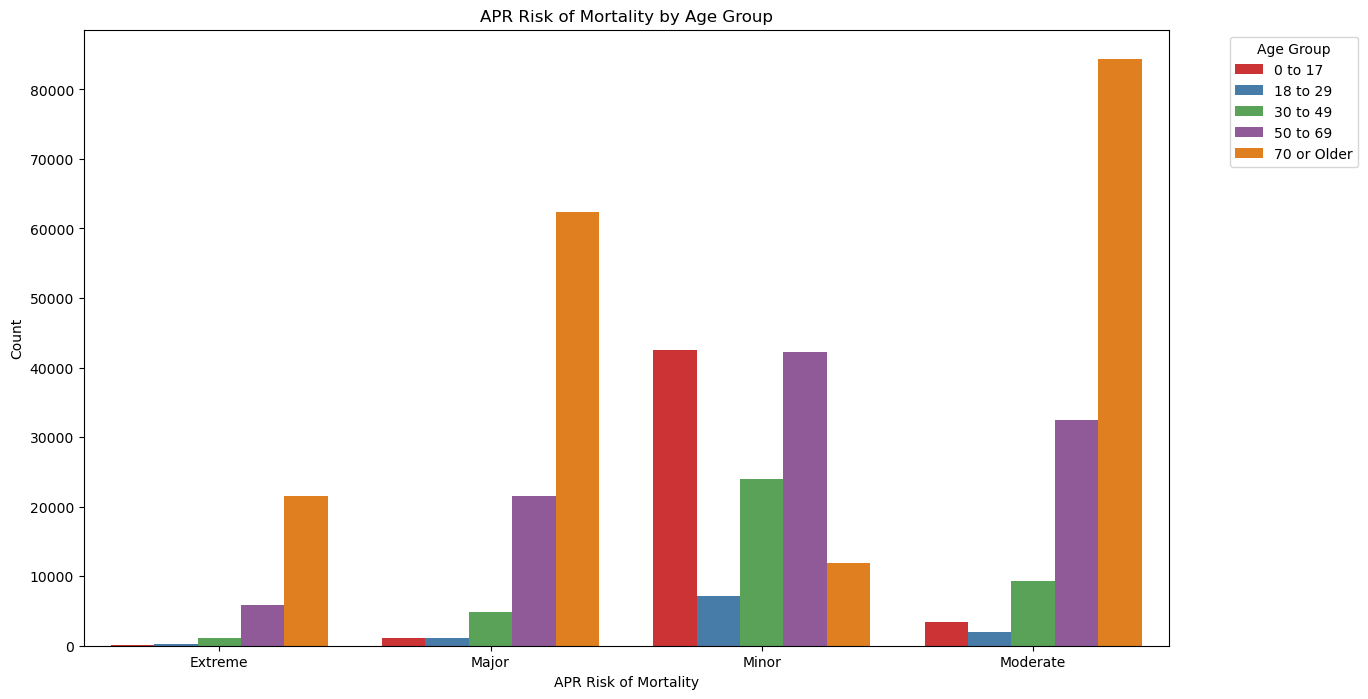

In [92]:
# Melt the data for plotting
risk_age_df = pd.melt(risk_age_table.reset_index(), id_vars='APR Risk of Mortality', var_name='Age Group', value_name='Count')

# Plot the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='APR Risk of Mortality', y='Count', hue='Age Group', data=risk_age_df, palette='Set1')
plt.title('APR Risk of Mortality by Age Group')
plt.xlabel('APR Risk of Mortality')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Extreme Risk: This risk level is most prevalent among the elderly (70 or Older) with 21,542 cases. It decreases significantly in younger age groups, with the fewest cases in the 0 to 17 age group (152 cases).

- Major Risk: The highest counts are observed in the 70 or Older age group (62,306), followed by the 50 to 69 group (21,572). Younger age groups, particularly 0 to 17 and 18 to 29, have fewer cases (1,057 and 1,104, respectively).

- Minor Risk: This risk is most common among the 0 to 17 age group (42,588) and significantly drops in older age groups, particularly in those aged 70 or Older (11,836).

- Moderate Risk: The highest counts are in the 70 or Older group (84,364) and 50 to 69 group (32,440). The risk is lower in younger age groups, with the least number of cases in the 18 to 29 group (2,007).

### 3.3 Multivariate Analysis

### Severity of Ilness by Gender and Race

In [93]:
# Create the contingency table
contingency_table_severity_gender_race = pd.crosstab(index=[df['APR Severity of Illness Description'], df['Race']], columns=df['Gender'])

# Print the contingency table
print(contingency_table_severity_gender_race)

Gender                                                          F      M  U
APR Severity of Illness Description Race                                   
Extreme                             Black/African American   2951   2664  0
                                    Multi-racial               62     54  0
                                    Other Race               2440   3031  0
                                    Unknown                    64     57  0
                                    White                   12747  13382  0
Major                               Black/African American  10774   9384  2
                                    Multi-racial              200    208  0
                                    Other Race               9620  10163  0
                                    Unknown                   200    233  0
                                    White                   49905  47907  0
Minor                               Black/African American   5005   4990  0
            

In [94]:
# Create the contingency table
contingency_table_severity_gender_race = pd.crosstab(
    [df['APR Severity of Illness Description'], df['Race']],
    df['Gender'],
    margins=False
).reset_index()

# Rename columns for clarity
contingency_table_severity_gender_race.columns.name = None  # Remove the name of the columns
contingency_table_severity_gender_race = contingency_table_severity_gender_race.rename(columns={'U': 'Unknown'})


In [95]:
# Melt the data for plotting
severity_gender_race_df = pd.melt(
    contingency_table_severity_gender_race,
    id_vars=['APR Severity of Illness Description', 'Race'],
    value_vars=['F', 'M', 'Unknown'],
    var_name='Gender',
    value_name='Count'
)

C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


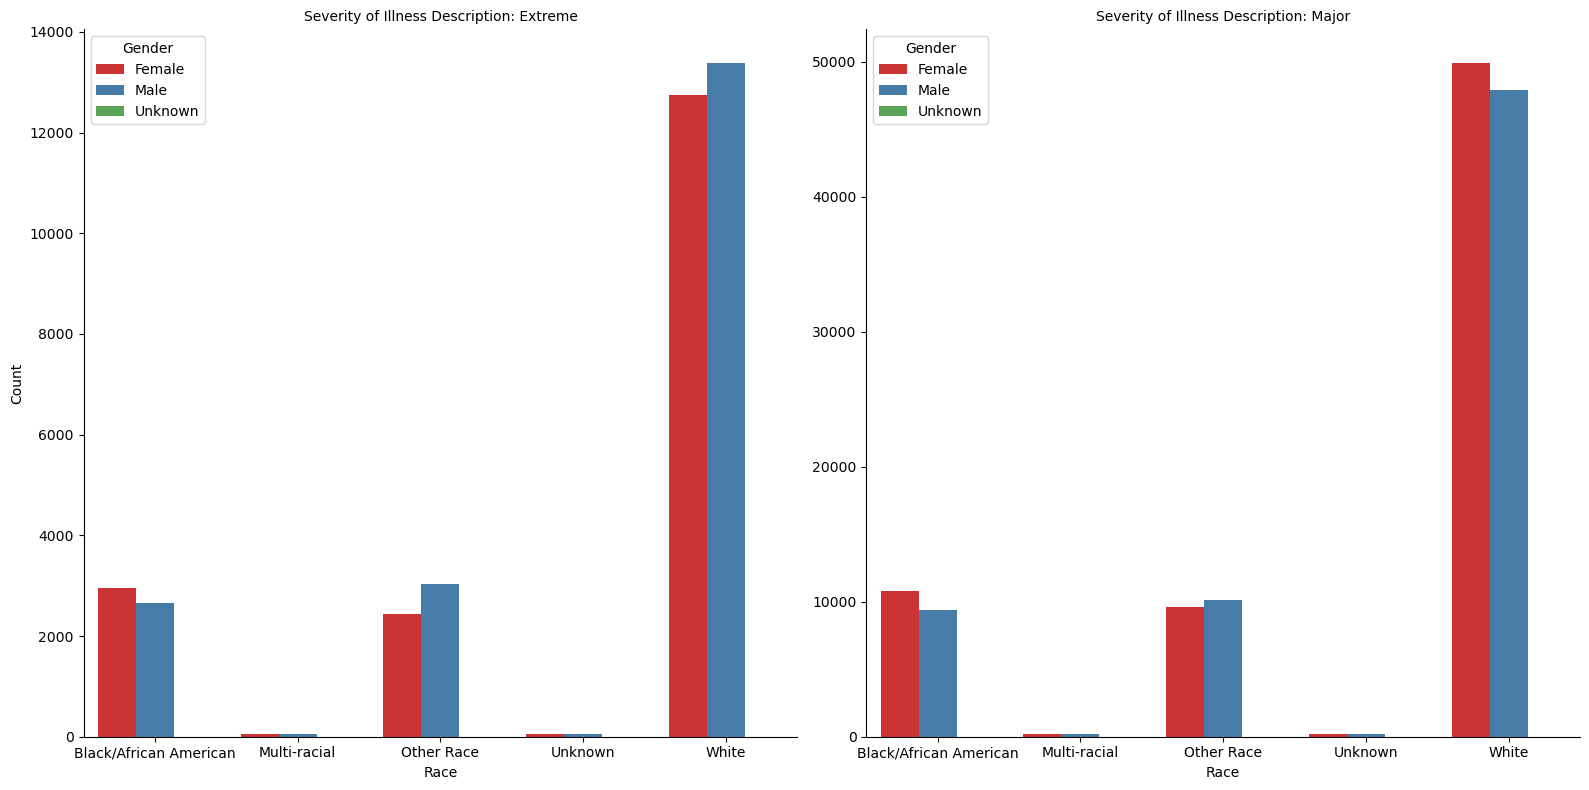

In [96]:
# Filter data for the first two severity descriptions
severity_descriptions_first_half = ['Extreme', 'Major']
subset_data_first_half = severity_gender_race_df[severity_gender_race_df['APR Severity of Illness Description'].isin(severity_descriptions_first_half)]

# Plot the FacetGrid for the first two severity descriptions
g1 = sns.FacetGrid(subset_data_first_half, col='APR Severity of Illness Description', col_wrap=2, height=8, sharey=False)
g1.map(sns.barplot, 'Race', 'Count', 'Gender', palette='Set1')

# Modify legend
for ax in g1.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    # Update legend labels
    new_labels = ['Female', 'Male', 'Unknown']
    ax.legend(handles=handles, labels=new_labels, title='Gender')

# Set axis labels and titles
g1.set_axis_labels('Race', 'Count')
g1.set_titles(col_template='Severity of Illness Description: {col_name}')

plt.show()

C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


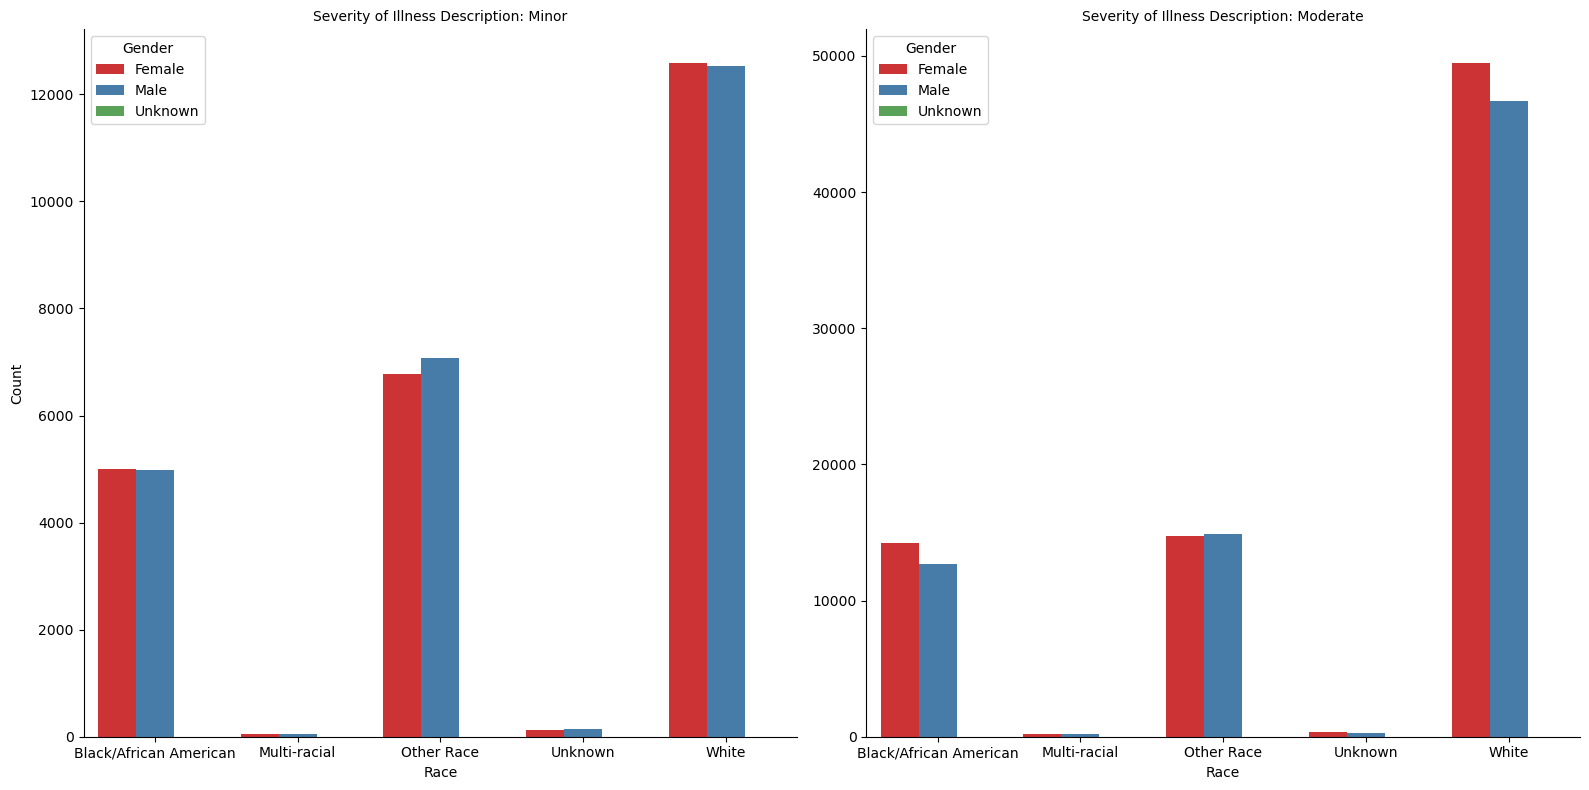

In [97]:
# Filter data for the second two severity descriptions
severity_descriptions_second_half = ['Minor', 'Moderate']
subset_data_second_half = severity_gender_race_df[severity_gender_race_df['APR Severity of Illness Description'].isin(severity_descriptions_second_half)]

# Plot the FacetGrid for the second two severity descriptions
g2 = sns.FacetGrid(subset_data_second_half, col='APR Severity of Illness Description', col_wrap=2, height=8, sharey=False)
g2.map(sns.barplot, 'Race', 'Count', 'Gender', palette='Set1')

# Customize the legend
for ax in g2.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    # Update legend labels
    new_labels = ['Female', 'Male', 'Unknown']
    ax.legend(handles=handles, labels=new_labels, title='Gender')

# Set axis labels and titles
g2.set_axis_labels('Race', 'Count')
g2.set_titles(col_template='Severity of Illness Description: {col_name}')

plt.show()

- Severity Distribution: Females generally have higher counts in the major and moderate severity categories, while males have slightly higher counts in the extreme severity category.
- Gender Distribution: For all severity levels, the number of cases with unknown gender is very low, indicating that the majority of cases have well-documented gender information.
- Comparative Insight: Most severity levels show more cases for females compared to males, except for extreme severity, where males slightly outnumber females.

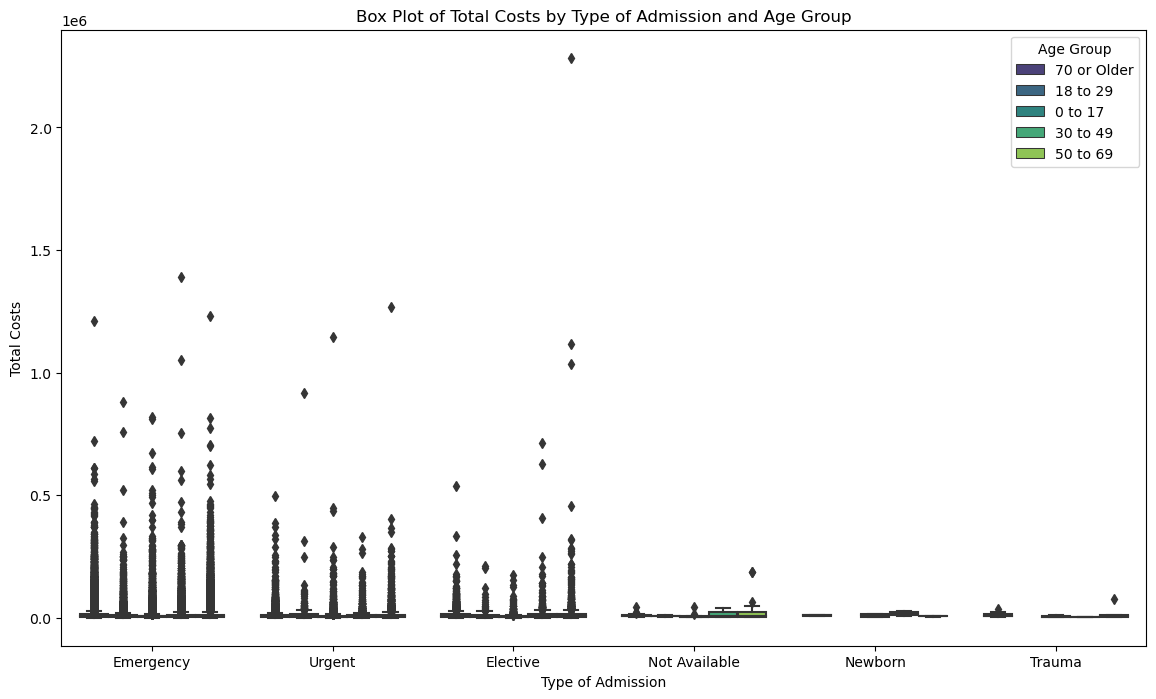

In [98]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Type of Admission', y='Total Costs', hue='Age Group', data=df, palette='viridis')
plt.title('Box Plot of Total Costs by Type of Admission and Age Group')
plt.xlabel('Type of Admission')
plt.ylabel('Total Costs')
plt.legend(title='Age Group')
plt.show()

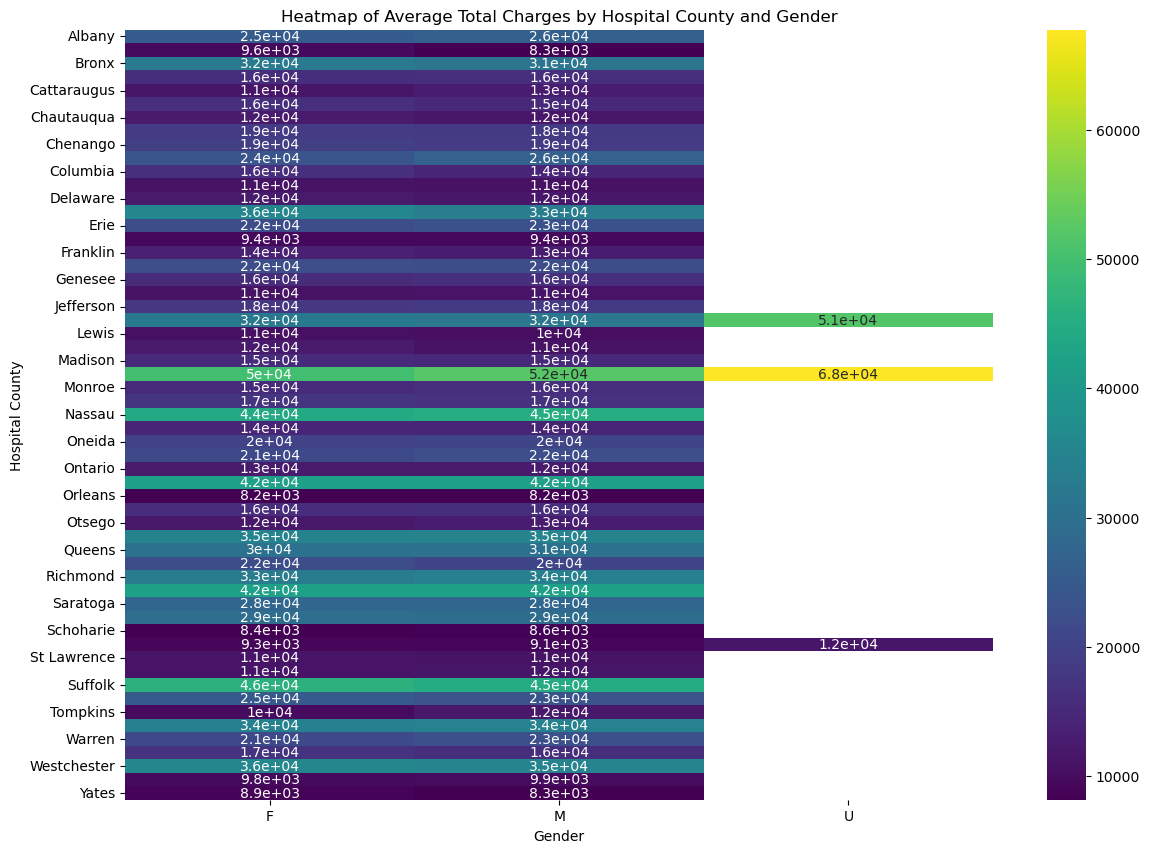

In [99]:
pivot_table = df.pivot_table(values='Total Charges', index='Hospital County', columns='Gender', aggfunc='mean')
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Heatmap of Average Total Charges by Hospital County and Gender')
plt.xlabel('Gender')
plt.ylabel('Hospital County')
plt.show()

C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


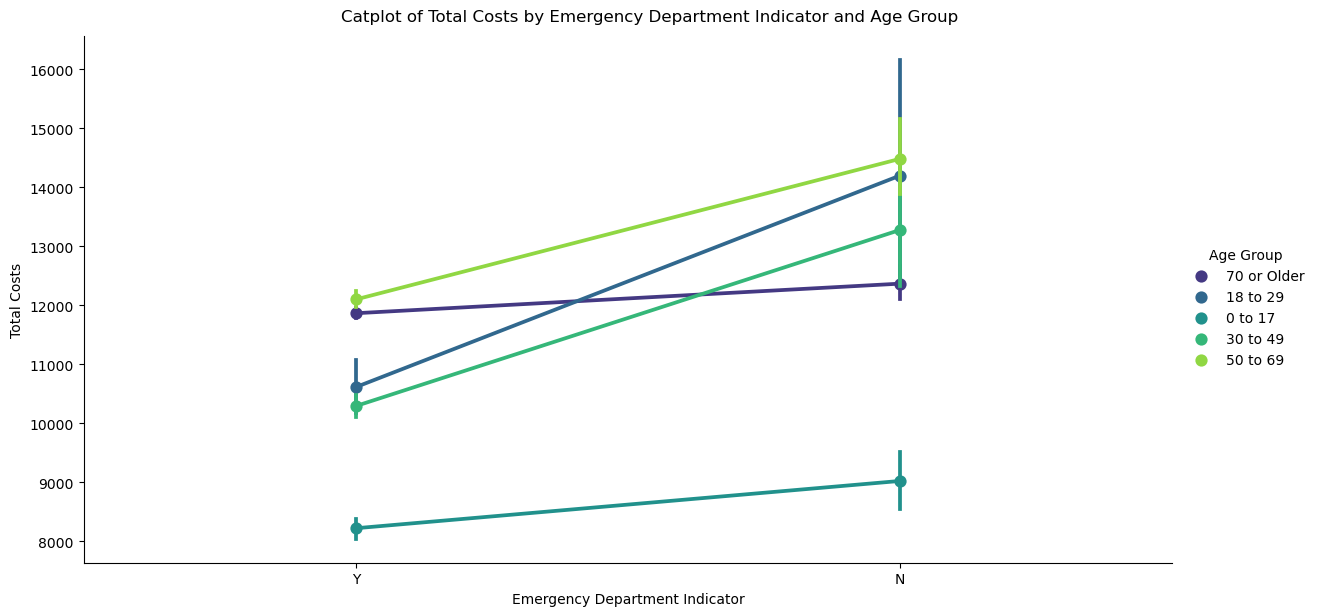

In [100]:
g = sns.catplot(x='Emergency Department Indicator', y='Total Costs', hue='Age Group', data=df, kind='point', palette='viridis', height=6, aspect=2)
g.fig.suptitle('Catplot of Total Costs by Emergency Department Indicator and Age Group', y=1.02)
plt.xlabel('Emergency Department Indicator')
plt.ylabel('Total Costs')
plt.show()

C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


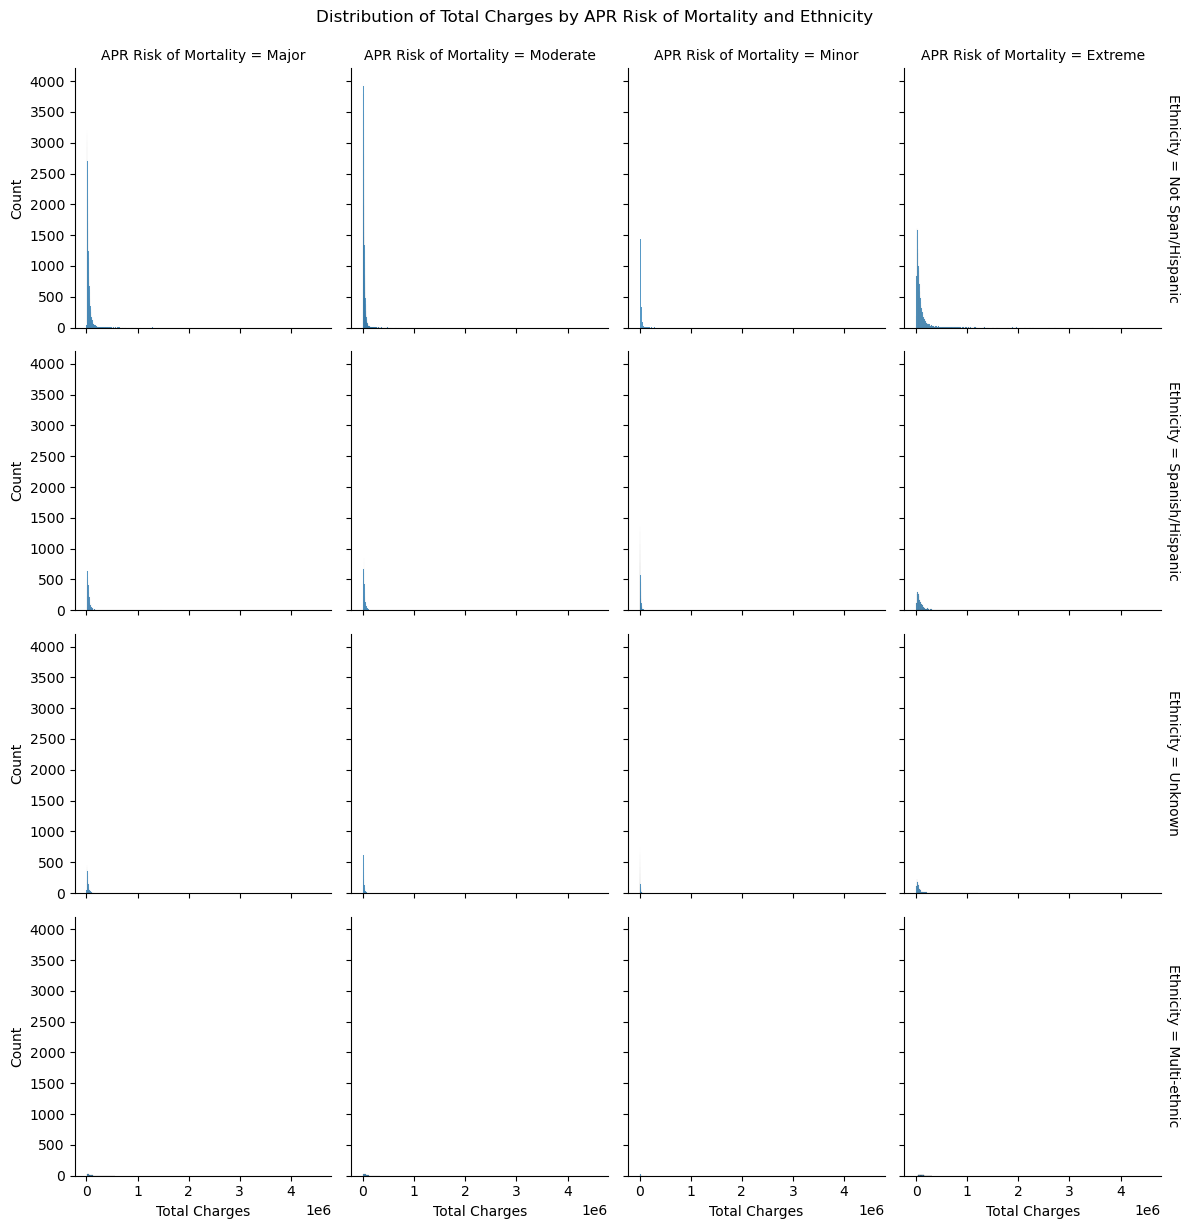

In [101]:
g = sns.FacetGrid(df, row='Ethnicity', col='APR Risk of Mortality', margin_titles=True, palette='viridis')
g.map(sns.histplot, 'Total Charges', kde=False)
g.fig.suptitle('Distribution of Total Charges by APR Risk of Mortality and Ethnicity', y=1.02)
plt.show()

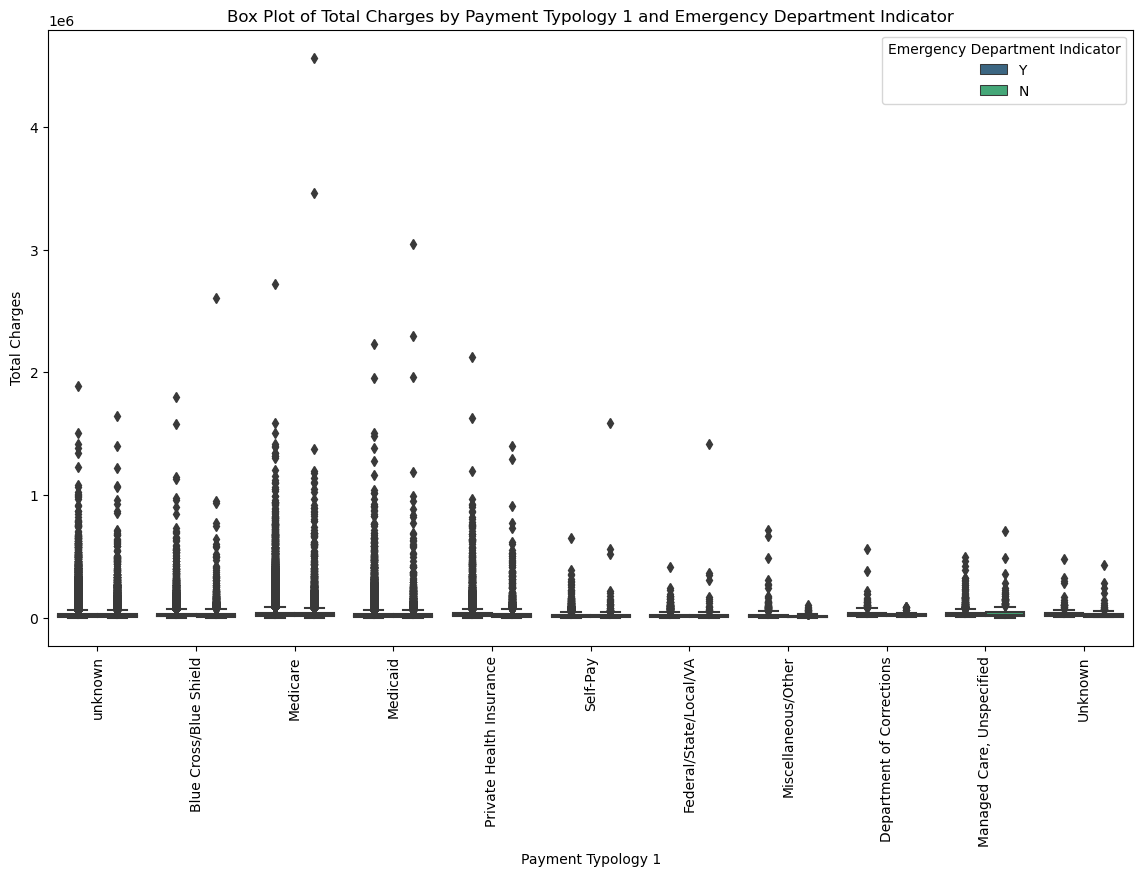

In [102]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Payment Typology 1', y='Total Charges', hue='Emergency Department Indicator', data=df, palette='viridis')
plt.title('Box Plot of Total Charges by Payment Typology 1 and Emergency Department Indicator')
plt.xlabel('Payment Typology 1')
plt.ylabel('Total Charges')
plt.legend(title='Emergency Department Indicator', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()